# FILM RECOMMENDATION AND IMDB PREDICTION SYSTEMS FOR NETFLIX DATA - GROUP ID:15
<font color="green">


Group Members:

Ece Kurnaz 26727           
Pelin Yüksel  24897      
Beril Yanıkömeroğlu 26902    
Erdem Baha Arslan 24855       
Mustafa Çağdaş Çapuk 25011


### Introduction



In this project, two different datasets were used. Netflix Movies and TV Shows data (netflix_titles.csv) includes show id, type (movie or tv show), title, director, cast, country, date added, release year, rating, duration, category and description.  Also, another dataset was used to get the IMDb information of the movies and tv shows (IMDb movies.csv) to elaborate our data and to have accurate results in the project. At the beginning data merging and data cleaning was performed. After that, various EDA analysis were applied as well as Spearman and Pearson Correlation was performed to see the correlated features. This project has two main objectives. One of the objectives of this project is to create a recommendation system to give users the opportunity to watch movies similar to the one they have previously watched. For that purpose, we implemented 2 unsupervised machine learning algorithms. These are Cosine Similarity and K-means clustering. In Cosine Similarity, we took the columns as our features and converted them into a bag of words at a new column, then performed a similarity matrix and get a score based on each movie's relation. In K-means clustering, in order to visualize the results, dimensionality reduction was performed by using Principal Component Analysis. The other objective of this project is to create an IMDb rating prediction system. In that way, when a new movie is going to be released, its IMDb rating can be predicted. We implemented 3 supervised machine learning algorithms for that. Two of them are classification algorithms which are KNN and Random Forest classification. For the regression, Linear Regression algorithm was implemented. Also, we performed encoding to convert the columns that have string values into columns that have integer values in order to use these columns in the algorithms that needs integer values in features such as the algorithms from Sklearn library (K-means, KNN, Random Forest, Linear Regression was used). At the end we compare the film recommendation and IMDb prediction systems among themselves. Then, we tried to determine the best algorithms for both recommendation and prediction systems.

### Problem Description                                     


One of the main problem of our dataset is that, from our data, a netflix user cannot understand which movie or tv show to watch that is similar to the one they previously watched.
The other main problem is that, when a new film or tv show is released, it will take time to see its IMDb rating. However, that would be great if we have a prediction algrithm for newly released films to predict their IMDb ratings.

Also, in order to visualize and analyze our data in a better way we thought that; data cleaning, EDA and dimensionality reduction needs to be performed.




### Utilized Datasets


*  Netflix
https://www.kaggle.com/shivamb/netflix-shows    
Our first dataset consists of Movies and TV Shows available on Netflix as of 2019. The file name is "netflix_titles.csv". The dataset is collected from Flixable which is a third-party Netflix search engine.

* IMDb data   
https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset  
This link contains 4 files, we used the file named "IMDb movies.csv".
IMDb is the most popular movie and tv show website and it includes plot,cast, description,ratings,user ratings, release years, and many more aspects.


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


### Data Preprocessing

####Importing and Reading both files

In [ ]:
path_prefix = "/content/drive/My Drive"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
%matplotlib inline
imdbmovies_data = pd.read_csv(join(path_prefix, "IMDb movies.csv"))
netflixtitles_data = pd.read_csv(join(path_prefix, "netflix_titles.csv"))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
IMDb_movies = imdbmovies_data.copy()
IMDb_movies.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [ ]:
numberofrows_1, numberofcolumns_1 = IMDb_movies.shape
print("There are {} rows and {} columns".format(numberofrows_1, numberofcolumns_1)+" in our IMDb Dataset.")

There are 85855 rows and 22 columns in our IMDb Dataset.


In [ ]:
Netflix_titles = netflixtitles_data.copy()
Netflix_titles.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [ ]:
numberofrows_2, numberofcolumns_2 = Netflix_titles.shape
print("There are {} rows and {} columns".format(numberofrows_2, numberofcolumns_2)+" in our Netflix Dataset.")

There are 6234 rows and 12 columns in our Netflix Dataset.


####Merging two datas by their Movie Titles

In [ ]:
result = pd.merge(left=IMDb_movies, right=Netflix_titles, left_on='title', right_on='title')
result.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration_x,country_x,language,director_x,writer,production_company,actors,description_x,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,show_id,type,director_y,cast,country_y,date_added,release_year,rating,duration_y,listed_in,description_y
0,tt0007338,Sherlock Holmes,Sherlock Holmes,1916,1916-05-15,Mystery,116,USA,English,Arthur Berthelet,"H.S. Sheldon, William Gillette",The Essanay Film Manufacturing Company,"William Gillette, Marjorie Kay, Ernest Maupain...",When a couple of swindlers hold young Alice Fa...,6.4,313,NaN,NaN,NaN,NaN,10.0,16.0,70110558,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom","April 1, 2019",2009,PG-13,128 min,"Action & Adventure, Comedies",Robert Downey Jr. stars as the legendary sleut...
1,tt0013597,Sherlock Holmes,Sherlock Holmes,1922,1922-03-07,"Drama, Mystery",85,USA,English,Albert Parker,"Earle Browne, Arthur Conan Doyle",Goldwyn Pictures Corporation,"John Barrymore, Roland Young, Carol Dempster, ...",A young Sherlock Holmes seeks to bring down th...,5.8,551,NaN,$ 384770,NaN,NaN,18.0,15.0,70110558,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom","April 1, 2019",2009,PG-13,128 min,"Action & Adventure, Comedies",Robert Downey Jr. stars as the legendary sleut...


In [ ]:
numberofrows_3, numberofcolumns_3 = result.shape
print("There are {} rows and {} columns".format(numberofrows_3, numberofcolumns_3)+" in our Resulting Dataset which we obtained by merging IMDb and Netflix dataset by their Movie title.")

There are 2332 rows and 33 columns in our Resulting Dataset which we obtained by merging IMDb and Netflix dataset by their Movie title.


####Data Cleaning

#####Duplicate values

In [ ]:
len(np.unique(result.title))

1798

We can clearly see that there are some duplicated movies because there are 2332 lines in our resulting data but number of unique titles are 1798. So, we will take the first occurence of that movie and drop the others which are same by the movie title.

In [ ]:
result.drop_duplicates(subset="title", keep='first', inplace=True)
result.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration_x,country_x,language,director_x,writer,production_company,actors,description_x,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,show_id,type,director_y,cast,country_y,date_added,release_year,rating,duration_y,listed_in,description_y
0,tt0007338,Sherlock Holmes,Sherlock Holmes,1916,1916-05-15,Mystery,116,USA,English,Arthur Berthelet,"H.S. Sheldon, William Gillette",The Essanay Film Manufacturing Company,"William Gillette, Marjorie Kay, Ernest Maupain...",When a couple of swindlers hold young Alice Fa...,6.4,313,NaN,NaN,NaN,NaN,10.0,16.0,70110558,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom","April 1, 2019",2009,PG-13,128 min,"Action & Adventure, Comedies",Robert Downey Jr. stars as the legendary sleut...
5,tt0012382,Leap Year,Leap Year,1924,1924-01-11,Comedy,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle","Walter Woods, Sarah Y. Mason",Paramount Pictures,"Roscoe 'Fatty' Arbuckle, Lucien Littlefield, M...","A young man, heir to his misogynistic and mill...",6.1,268,NaN,NaN,NaN,NaN,9.0,1.0,70124331,Movie,Anand Tucker,"Amy Adams, Matthew Goode, Adam Scott, John Lit...","United States, Ireland","November 15, 2019",2010,PG,100 min,"Comedies, Romantic Movies",Anna chooses February 29 to propose marriage t...
6,tt0013704,The Trap,The Trap,1922,1922-05-09,Drama,60,USA,English,Robert Thornby,"Lon Chaney, Lucien Hubbard",Universal Film Manufacturing Company,"Lon Chaney, Alan Hale, Dagmar Godowsky, Stanle...",A miner's happiness is destroyed when a rival ...,6.0,118,NaN,NaN,NaN,NaN,10.0,3.0,80209751,Movie,Erik White,"T.I., Mike Epps, Loretta Devine, Queen Latifah...",United States,"April 1, 2019",2017,TV-MA,91 min,Comedies,A man returns home to Atlanta to try and turn ...
9,tt0015136,Michael,Michael,1924,1924-11-17,"Drama, Romance",93,Germany,NaN,Carl Theodor Dreyer,"Herman Bang, Thea von Harbou",Universum Film (UFA),"Walter Slezak, Benjamin Christensen, Nora Greg...","Triangle story: painter, his young male model,...",7.1,1540,NaN,NaN,NaN,NaN,22.0,27.0,80165853,Movie,Ribhu Dasgupta,"Naseeruddin Shah, Mahie Gill, Sabyasachi Chakr...",India,"May 10, 2017",2011,TV-MA,86 min,"Dramas, Independent Movies, International Movies",After a dedicated cop accidentally kills a 12-...
13,tt0015684,The Circle,The Circle,1925,1925-09-22,Drama,71,USA,English,Frank Borzage,"Kenneth B. Clarke, W. Somerset Maugham",Metro-Goldwyn-Mayer (MGM),"Eleanor Boardman, Malcolm McGregor, Alec B. Fr...","Elizabeth Cheney has a wealthy husband, social...",6.3,491,NaN,NaN,NaN,NaN,12.0,4.0,81044551,TV Show,NaN,Michelle Buteau,NaN,"January 1, 2020",2020,TV-MA,1 Season,Reality TV,Status and strategy collide in this social exp...


Lets look if there are any duplicates left.

In [ ]:
anyduplicates=result.duplicated(["title"])
howmanydups=sum(anyduplicates)
format(howmanydups)

'0'

##### Dealing with NA values

In [ ]:
result.isnull().sum().sum()

5248

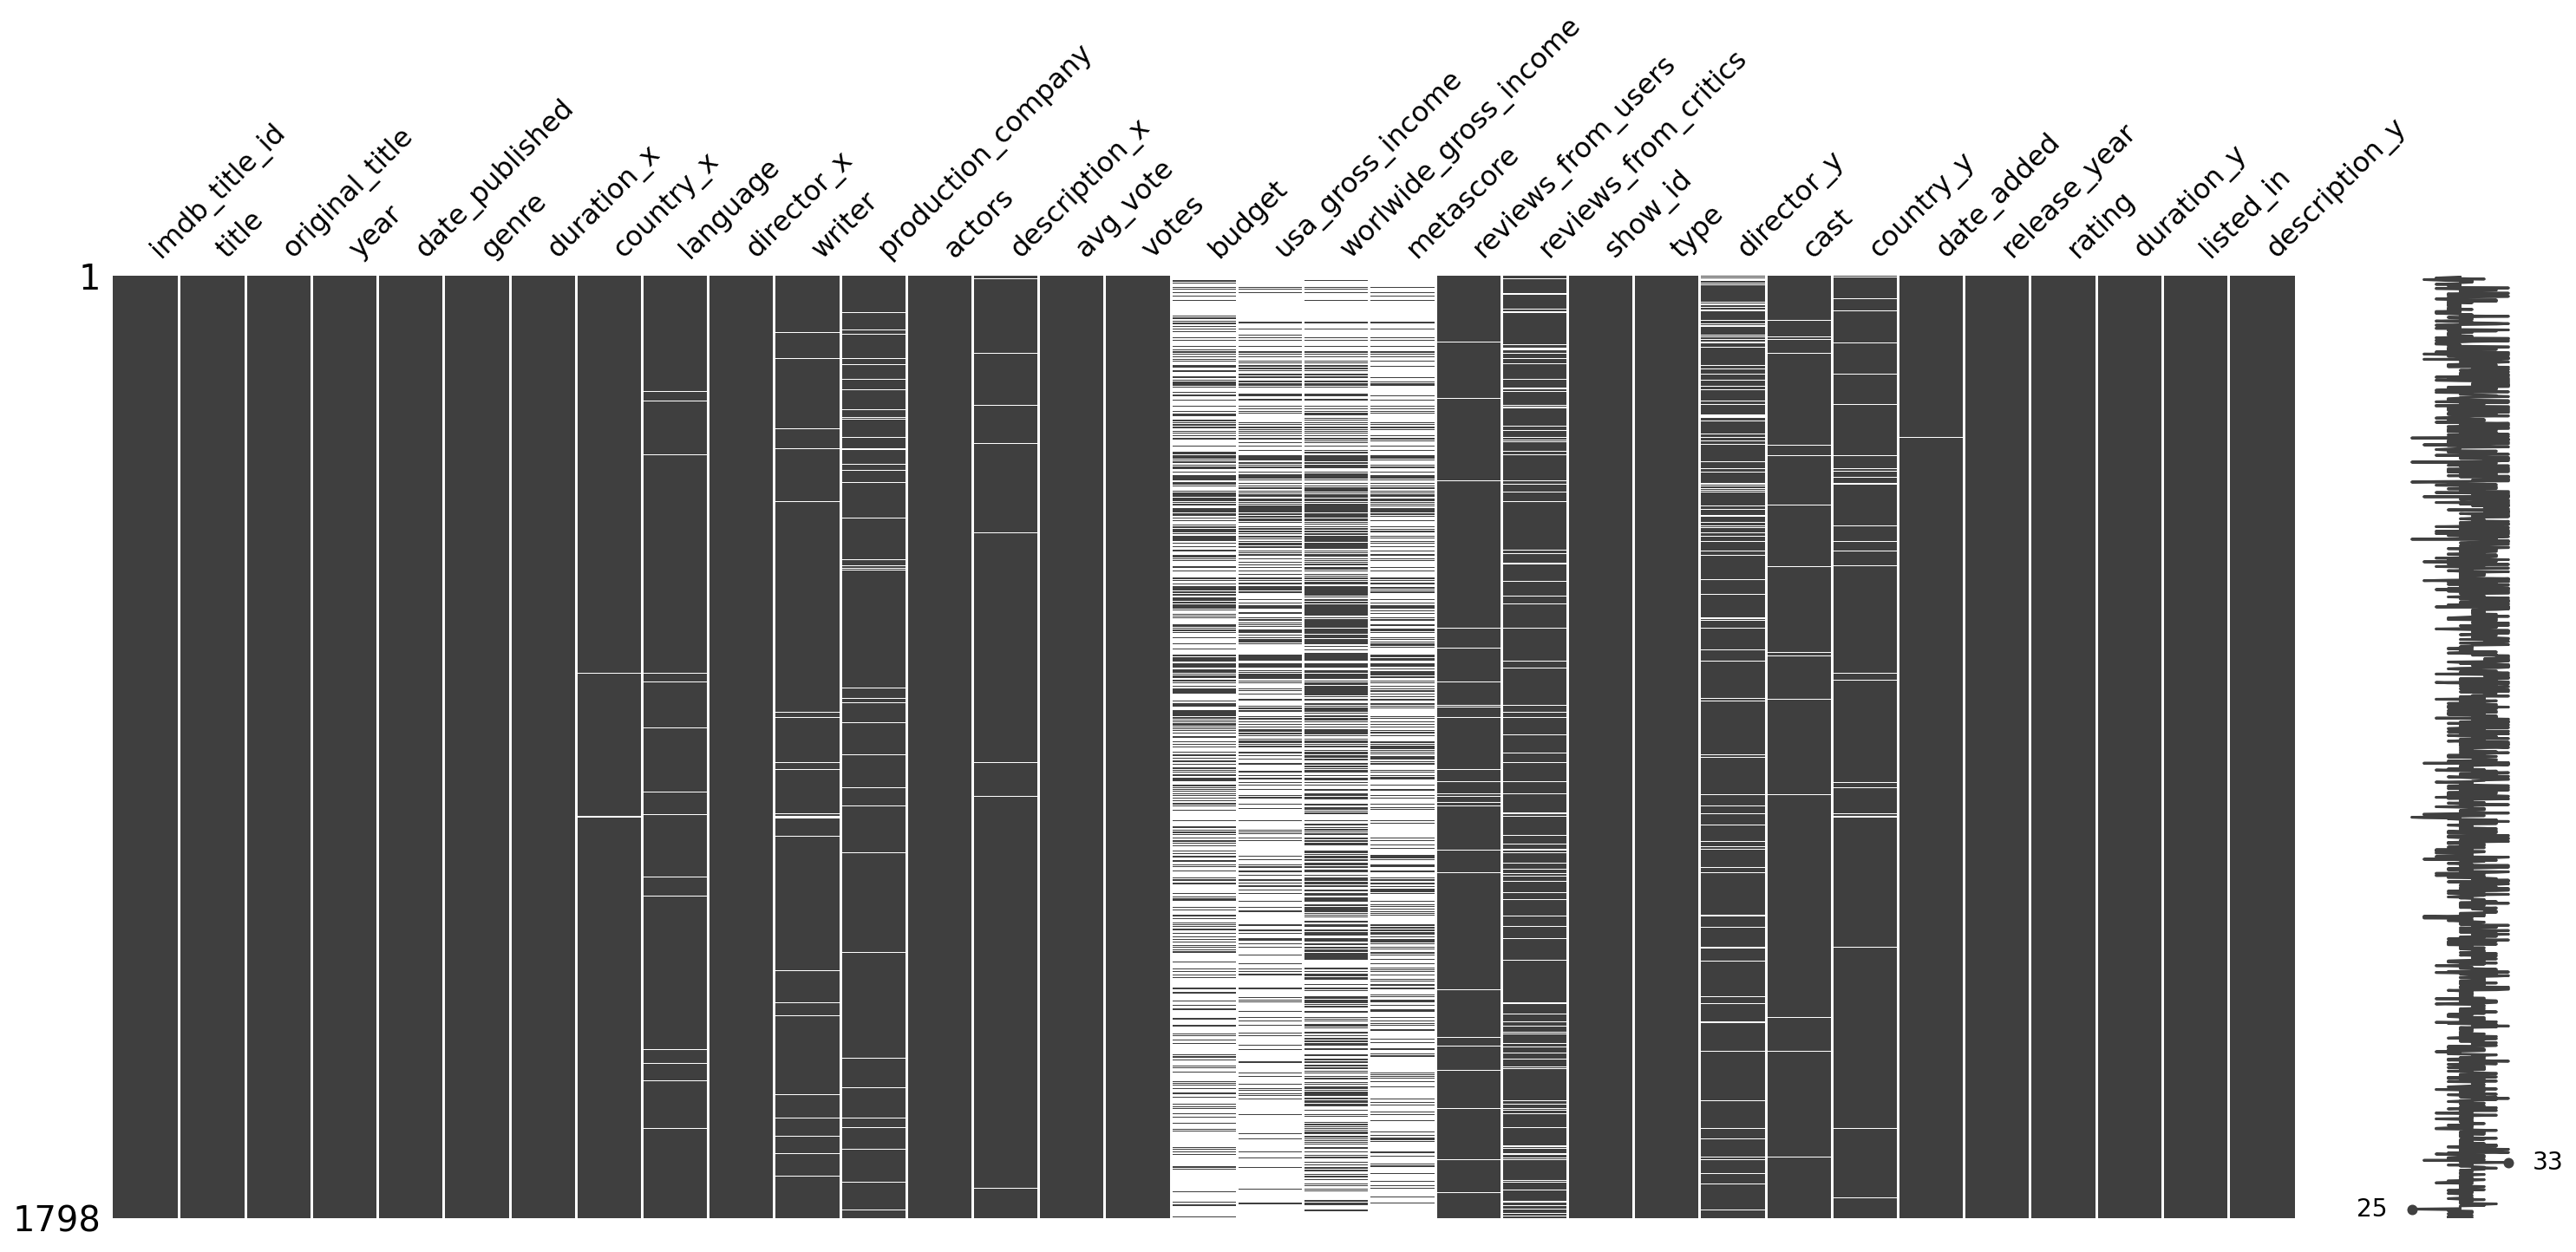

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(result)

In [ ]:
print('\nNumber of missing values by columns :') 
result.isnull().sum()


Number of missing values by columns :


imdb_title_id               0
title                       0
original_title              0
year                        0
date_published              0
genre                       0
duration_x                  0
country_x                   4
language                   21
director_x                  0
writer                     41
production_company         72
actors                      0
description_x              11
avg_vote                    0
votes                       0
budget                   1210
usa_gross_income         1274
worlwide_gross_income     889
metascore                1265
reviews_from_users         41
reviews_from_critics      170
show_id                     0
type                        0
director_y                178
cast                       32
country_y                  38
date_added                  1
release_year                0
rating                      1
duration_y                  0
listed_in                   0
description_y               0
dtype: int

To get an idea, if there are more missing values than 800 maybe we can consider droping them

In [ ]:
mostNAdrop = result.loc[:,(result.isna().sum()>800)].columns.tolist()
print(mostNAdrop)

['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore']


In [ ]:
result.director_x.fillna("No Director", inplace=True)
result.cast.fillna("No Cast", inplace=True)
result.country_x.fillna("Country Unavailable", inplace=True)
result.dropna(subset=["avg_vote","language"], inplace=True)
result.description_x.fillna("No Description", inplace=True)
result.budget.fillna("No Budget", inplace=True)
result.rating.fillna("No Rating", inplace=True)

Now, lets drop some of the most missing valued columns, repeated columns and also the columns that we will not use.

In [ ]:
result.drop(["director_y", "country_y","duration_y","description_y","original_title","date_added","year","actors","show_id","writer","usa_gross_income","worlwide_gross_income","metascore","reviews_from_users","reviews_from_critics","production_company","date_published","genre"], axis=1,inplace=True)
result .head(2)

,imdb_title_id,title,duration_x,country_x,language,director_x,description_x,avg_vote,votes,budget,type,cast,release_year,rating,listed_in
0,tt0007338,Sherlock Holmes,116,USA,English,Arthur Berthelet,When a couple of swindlers hold young Alice Fa...,6.4,313,No Budget,Movie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...",2009,PG-13,"Action & Adventure, Comedies"
5,tt0012382,Leap Year,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle","A young man, heir to his misogynistic and mill...",6.1,268,No Budget,Movie,"Amy Adams, Matthew Goode, Adam Scott, John Lit...",2010,PG,"Comedies, Romantic Movies"


#####Labelling Columns
Now we got our cleaned dataset, so we can rename our columns to clearly see our data.

In [ ]:
result.rename(columns={"imdb_title_id":"IMDb Title ID","title":"Title","release_year":"Year","listed_in":"Genre","duration_x":"Duration","country_x": "Country","language":"Language","director_x" : "Director", "description_x":"Description","avg_vote":"IMDb Rating","votes":"Votes","budget":"Budget","type":"Type","cast":"Cast","rating":"Rating"}, inplace=True)
result.head(2)

,IMDb Title ID,Title,Duration,Country,Language,Director,Description,IMDb Rating,Votes,Budget,Type,Cast,Year,Rating,Genre
0,tt0007338,Sherlock Holmes,116,USA,English,Arthur Berthelet,When a couple of swindlers hold young Alice Fa...,6.4,313,No Budget,Movie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...",2009,PG-13,"Action & Adventure, Comedies"
5,tt0012382,Leap Year,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle","A young man, heir to his misogynistic and mill...",6.1,268,No Budget,Movie,"Amy Adams, Matthew Goode, Adam Scott, John Lit...",2010,PG,"Comedies, Romantic Movies"


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1777 entries, 0 to 2331
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IMDb Title ID  1777 non-null   object 
 1   Title          1777 non-null   object 
 2   Duration       1777 non-null   int64  
 3   Country        1777 non-null   object 
 4   Language       1777 non-null   object 
 5   Director       1777 non-null   object 
 6   Description    1777 non-null   object 
 7   IMDb Rating    1777 non-null   float64
 8   Votes          1777 non-null   int64  
 9   Budget         1777 non-null   object 
 10  Type           1777 non-null   object 
 11  Cast           1777 non-null   object 
 12  Year           1777 non-null   int64  
 13  Rating         1777 non-null   object 
 14  Genre          1777 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 222.1+ KB


## Data Exploration

<font color="blue">
Explore the relationship between different variables across datasets. Perform hypothesis tests if necessary. Comment on your resulting figures and findings.

This section corresponds to the work you have done in the progress report.
</font>

First of all, let's look at Top 10 Movies and Top 10 TV Shows on Netflix by their IMDb Rating.

In [ ]:
netflix_shows=result[result['Type']=='TV Show'].sort_values(by = 'IMDb Rating', ascending = False)
netflix_movies=result[result['Type']=='Movie'].sort_values(by = 'IMDb Rating', ascending = False)

top10_movies = netflix_movies.sort_values("IMDb Rating", ascending = False)
top10_movies[['Title', "IMDb Rating"]][0:10]

,Title,IMDb Rating
354,Pulp Fiction,8.9
339,Schindler's List,8.9
1122,Inception,8.8
981,Oththa Seruppu Size 7,8.6
552,Koshish,8.6
1703,Eh Janam Tumhare Lekhe,8.6
659,City of God,8.6
203,Gol Maal,8.6
2214,Merku Thodarchi Malai,8.5
441,American History X,8.5


In [ ]:
top10_shows = netflix_shows.sort_values("IMDb Rating", ascending = False) 
top10_shows[['Title', "IMDb Rating"]][0:10] 

,Title,IMDb Rating
737,Black,8.2
130,Persona,8.1
640,My Sassy Girl,8.0
118,Spartacus,7.9
761,Trailer Park Boys,7.9
837,Mind Game,7.8
1585,1983,7.7
392,Leila,7.6
99,Godzilla,7.6
509,After Life,7.6


**In our data there is a guidance rating based on which age group should watch that content. From the keywords we can see that Little Kids refer to: Below 7 age, Older Kids: 7+, Teens: 13+, Adults: 17+ and also there are contents which are mentioned as Not Rated. So, here is the pie chart of Netflix content percentage for referring age groups.**

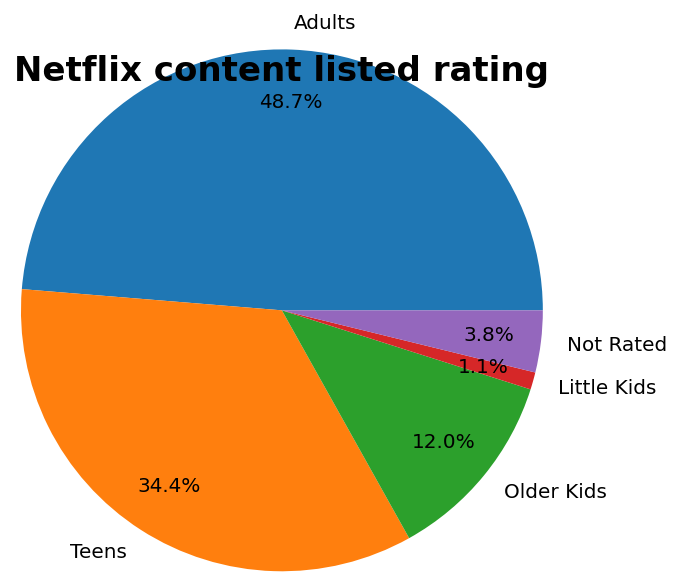

In [ ]:
little_kids=result.Rating.value_counts()['TV-Y']+result.Rating.value_counts()['TV-G']+ result.Rating.value_counts()['G']
older_kids= result.Rating.value_counts()['TV-Y7']+result.Rating.value_counts()['TV-Y7-FV']+result.Rating.value_counts()['TV-PG']+result.Rating.value_counts()['PG']
teens = result.Rating.value_counts()['TV-14']++result.Rating.value_counts()['PG-13']
adults = result.Rating.value_counts()['TV-MA']+result.Rating.value_counts()['R']+result.Rating.value_counts()['NC-17']
not_rated = result.Rating.value_counts()['NR']+result.Rating.value_counts()['UR']
plt.pie(x=[adults,teens,older_kids,little_kids,not_rated],labels=['Adults','Teens','Older Kids','Little Kids','Not Rated'],autopct='%1.1f%%',radius=1.5,pctdistance=0.8)
plt.title('Netflix content listed rating',fontsize=17,weight='bold')
plt.show()

As we can see, the content is mostly for adult audience (50%) which refers to older than 17 years (mature).                            
Also there is a big portion of content for Teens when we compare it to others (35%) which is not suitable for children below 13 years.        
The remaining 15% is suitable for kids below 13.

In conclusion, around 85% of Netflix movie and TV show content is addressing to audience above age 13 and 17. So they are teen and adult friendly.

**Here is a bar graph for distribution of all content's ratings by their counts.**

In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot 
import plotly.graph_objs as go

data = result['IMDb Rating'].value_counts().sort_index(ascending=False)

hold = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / result.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#010203'),
               y = data.values,
               marker = dict(color = '#ff7c00'))

layout = dict(title = 'Distribution Of {} Netflix-Ratings'.format(result.shape[0]),
              xaxis = dict(title = 'IMDb Rating'),
              yaxis = dict(title = 'Count'))

distfigure = go.Figure(data=[hold], layout=layout)
iplot(distfigure)

Minimum IMDb rate of a content is 1.9 while maximum given rate is 8.9 out of 10. There are only 118 votes below 4 while there are 1569 votes between 4-8 rating. So we can say that the rates below 4 and above 8 are given less compared to other ratings. Also, most frequent IMDb rating are between 6 and 7.

**A pie-chart to look different Genres distribution and their percentages.**

In [ ]:
from collections import Counter
eda_result=result.copy()
split_genre = ", ".join(eda_result['Genre']).split(", ")
split_genre = Counter(split_genre).most_common(10)

genrefig = go.Figure(data=[go.Pie(labels=[_[0] for _ in split_genre][::-1], values=[_[1] for _ in split_genre][::-1], 
                textinfo='label')], layout=go.Layout(title="Contents by their Genre"))
genrefig.show()

The dominant 3 Genres in Netflix are Comedies (13%), International Movies (24%) and Dramas (24%). But we also know that a movie or tv show can be both Comedy and Drama or International and Comedy etc. A content is International if it is not from USA.

**A box plot graph for analyzing average rating per Genre.**

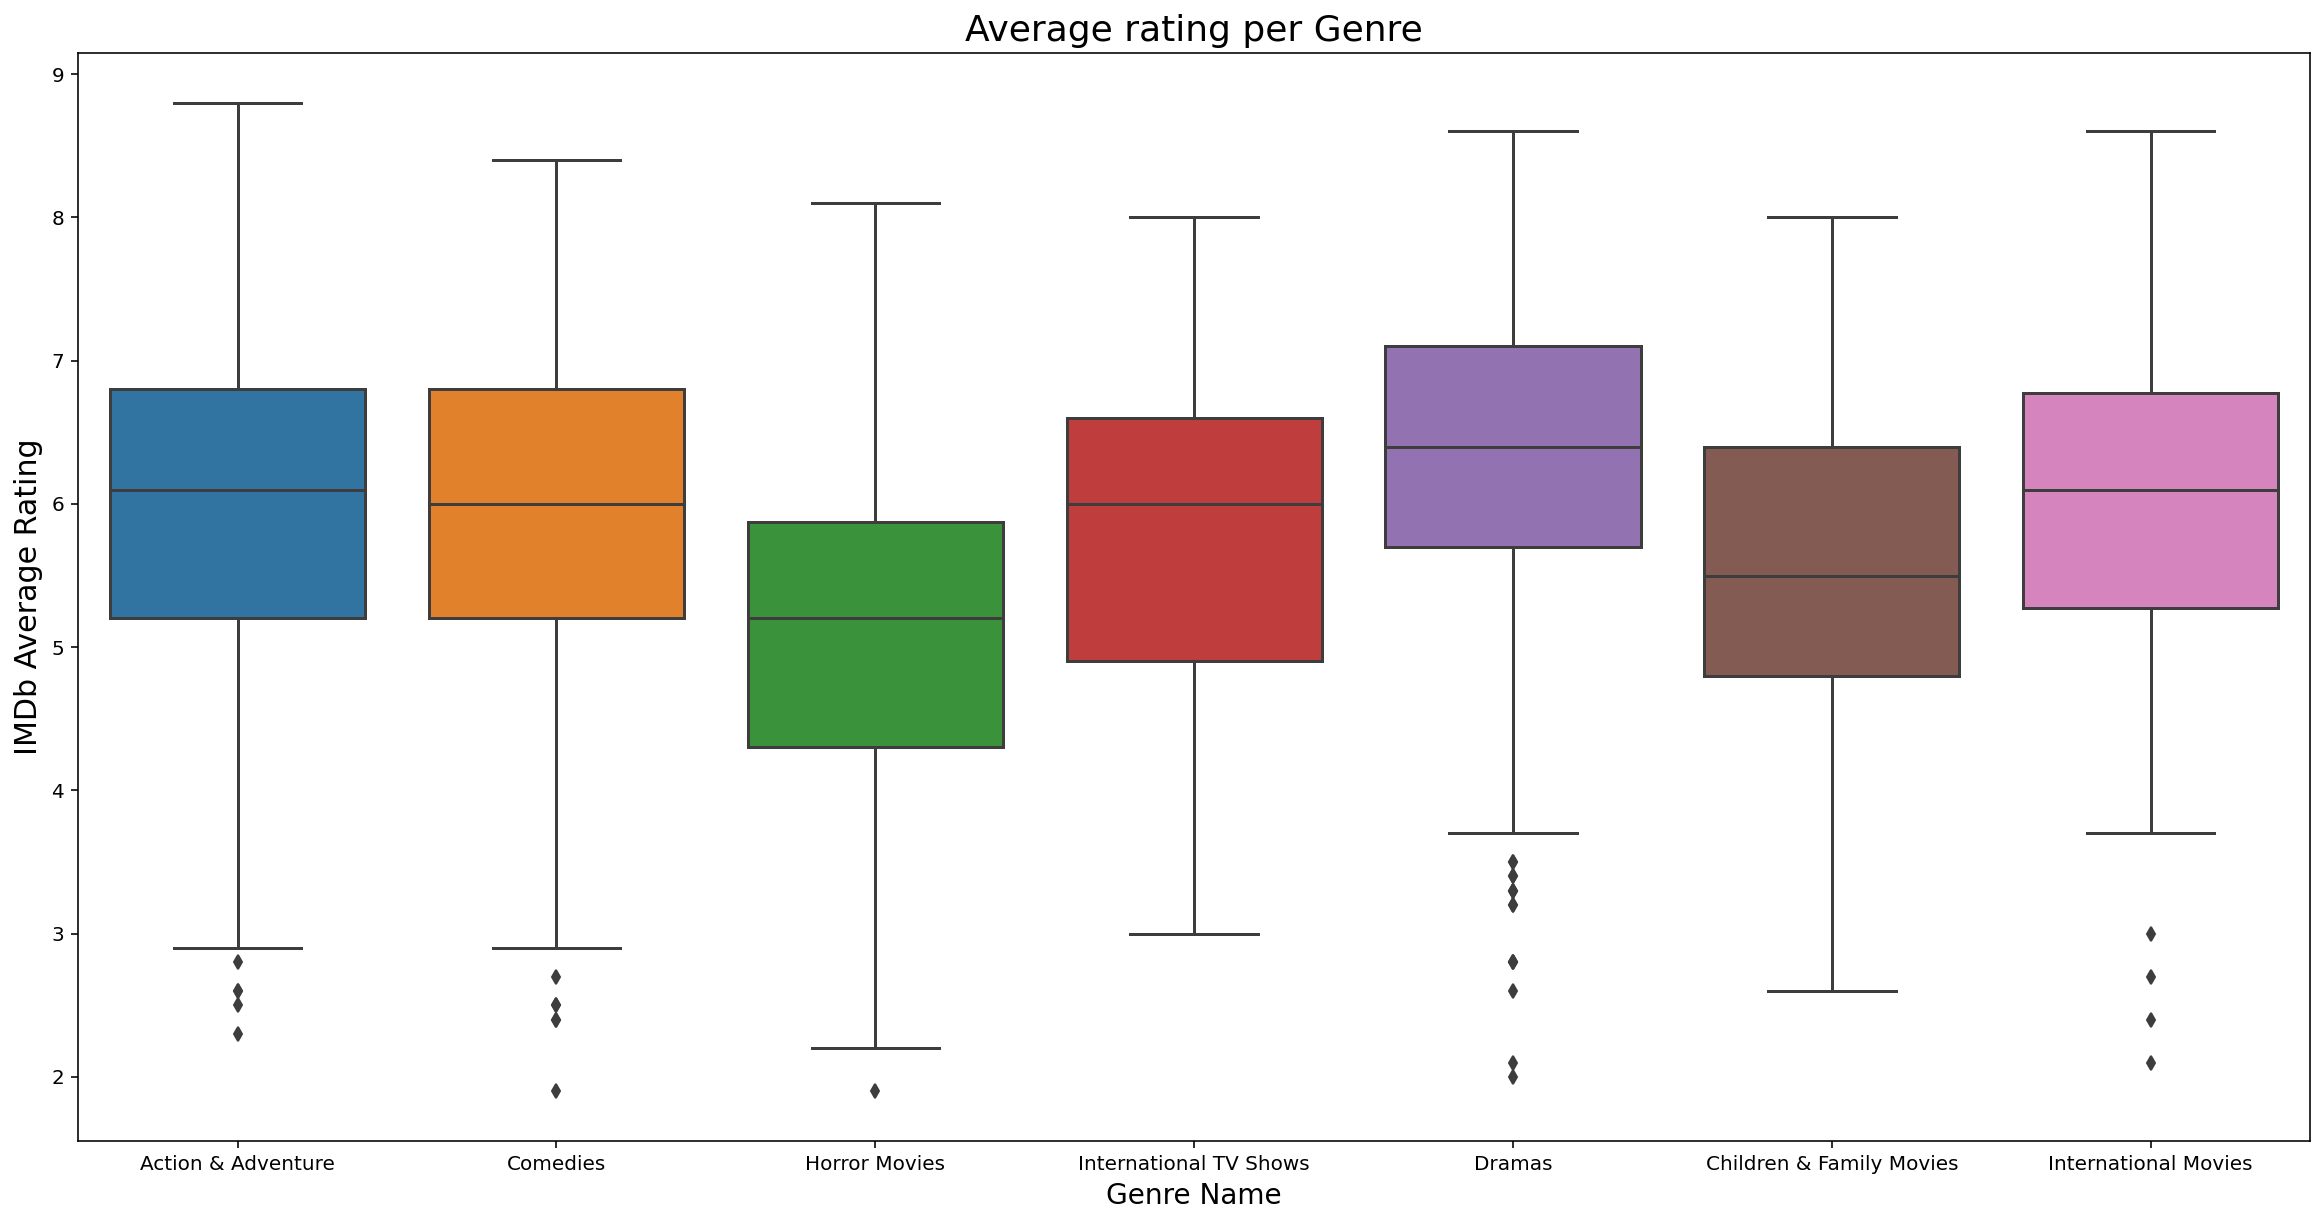

In [ ]:
eda_result['firstword_genre'] = eda_result['Genre'].str.split(',').str[0]
count = eda_result['firstword_genre'].value_counts()[:7]
top_genres = list(count.index)
genreratingbox = eda_result[eda_result['firstword_genre'].isin(top_genres)]
genreratingbox = genreratingbox[['firstword_genre', 'IMDb Rating', 'Votes']]

plt.figure(figsize=(20, 10))
sns.boxplot(x='firstword_genre', y='IMDb Rating', data=genreratingbox)
plt.xlabel("Genre Name",fontsize=14)
plt.ylabel("IMDb Average Rating",fontsize=15)
plt.title("Average rating per Genre", fontsize=18)
plt.show()

There are no significant difference between Genres rating distribution, they are generally rated around 6. The only significant difference is in Horror Movies which is rated around 5.

**Shows relation between Votes and IMDb Ratings**

(0.0, 10.0)

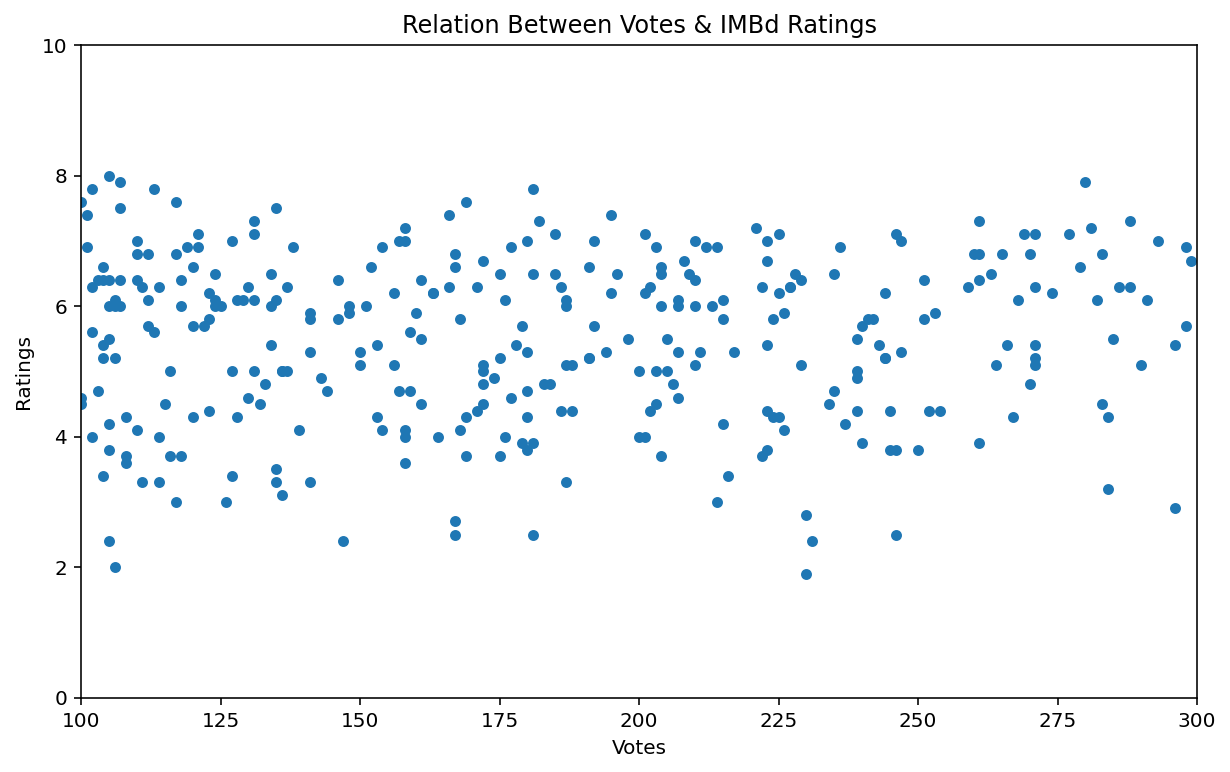

In [ ]:
ax=result.plot.scatter(x ='Votes', y ='IMDb Rating',figsize=(10,6)) 
ax.set_ylabel("Ratings")
ax.set_xlabel("Votes")
ax.set_title("Relation Between Votes & IMBd Ratings")
ax.set_xlim((100, 300))
ax.set_ylim((0, 10))

**Shows relation between Duration and IMDb Ratings.**
Duration & rating Pearson R value is 0.48 while Spearman R value is 0.52. 
Contents which have a duration between 75-125 minutes are the most voted ones, which also shows Most of the contents have a duration between 75-125 minutes.Graph shows that contents which have duration between 100-125 minutes have higher IMDb ratings compare to contents which have 75-100 min. duration. The reason that the spearman correlation coefficient higher than the pearson's is intensity in the 75-125 area.

(0.0, 10.0)

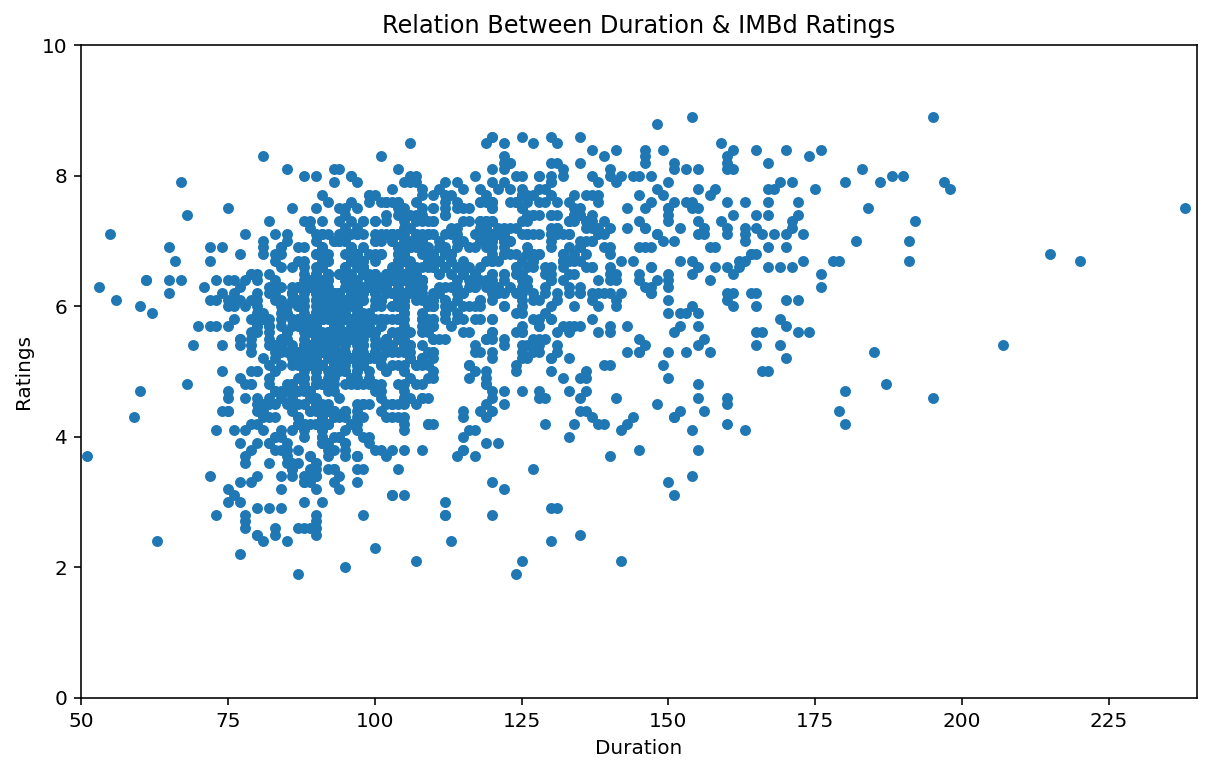

In [ ]:
ax=result.plot.scatter(x ='Duration', y ='IMDb Rating',figsize=(10,6)) 
ax.set_ylabel("Ratings")
ax.set_xlabel("Duration")
ax.set_title("Relation Between Duration & IMBd Ratings")
ax.set_xlim((50, 240))
ax.set_ylim((0, 10))

These variables shows the mean values of the contents which have a duration between 75-100 minutes and contents which have duration between 100-125 minutes. The average IMDb rating for the 75-100 min. contents 5.4 while the rating 6.2 for the 100-125 min. contents, the difference is 0.8.Which consistent with the ampirical observation made on the correlation graph.

In [ ]:
result125=result[result["Duration"]<=125]
result100_125=result125[result125["Duration"]>=100]
result100_125.mean()

Duration         110.938671
IMDb Rating        6.196082
Votes          33860.015332
Year            2013.350937
dtype: float64

In [ ]:
result75=result[result["Duration"]>=75]
result75_100=result75[result75["Duration"]<=100]
result75_100.mean()


Duration          90.215426
IMDb Rating        5.411170
Votes          14484.996011
Year            2014.457447
dtype: float64

This graph gives the relation between IMDb Rating and Country. Most of the films which have IMDb rating above 8 is originated India and USA

(0.0, 10.0)

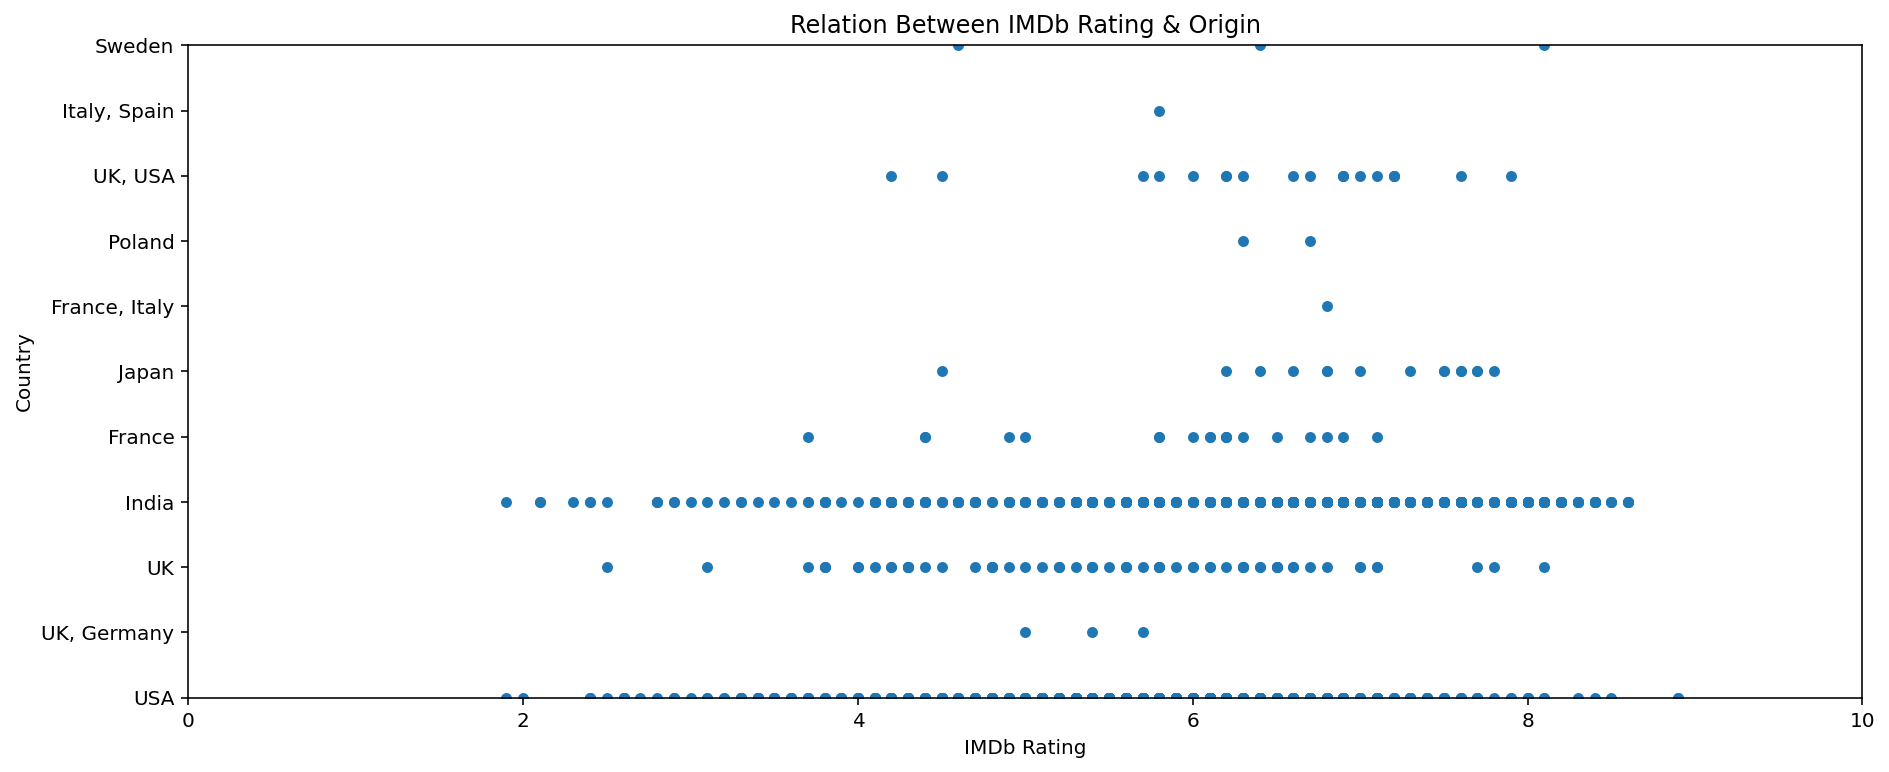

In [ ]:
ax=result.plot.scatter(x ='IMDb Rating', y ='Country',figsize=(15,6)) 
ax.set_ylabel("Country")
ax.set_xlabel("IMDb Rating")
ax.set_title("Relation Between IMDb Rating & Origin")
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))

Most of the content have duration between 75-125 minutes, only Indian contents have a majority up to 180 minute.


(0.0, 10.0)

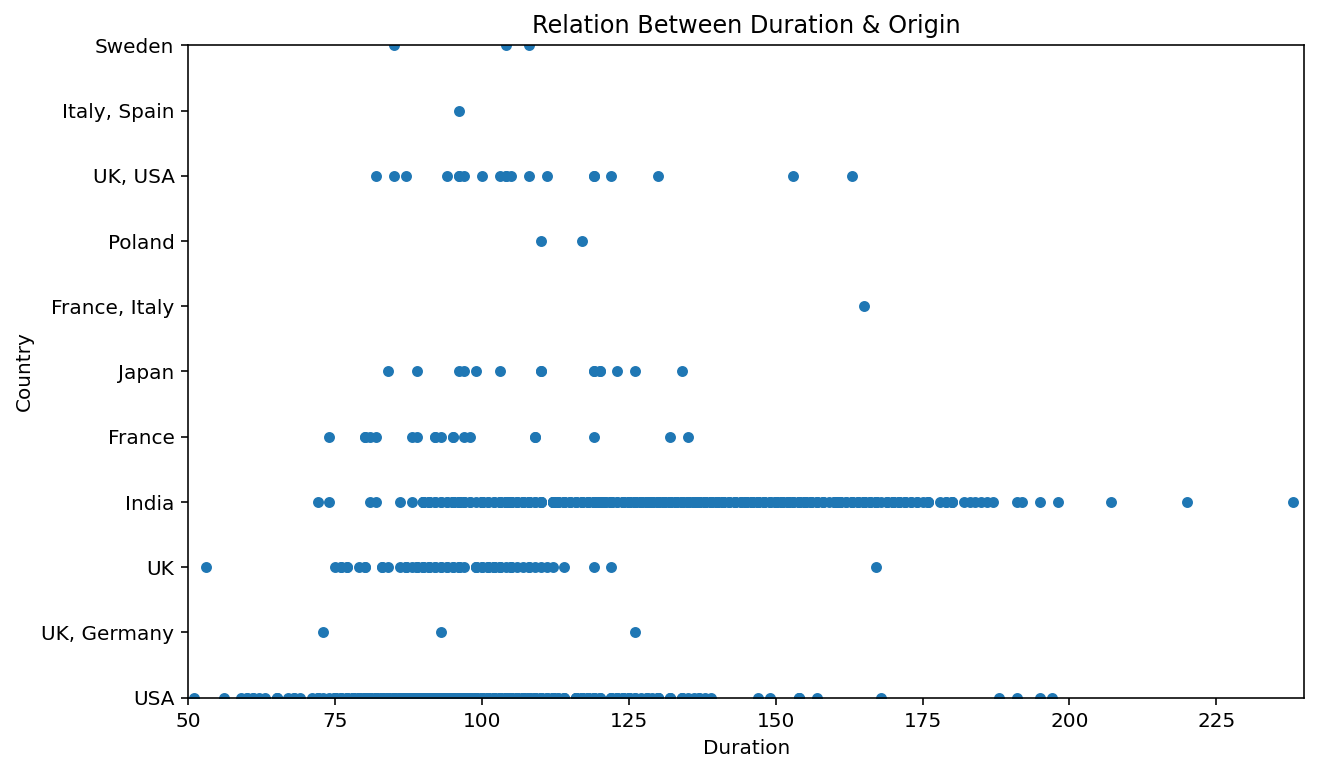

In [ ]:
ax=result.plot.scatter(x ='Duration', y ='Country',figsize=(10,6)) 
ax.set_ylabel("Country")
ax.set_xlabel("Duration")
ax.set_title("Relation Between Duration & Origin")
ax.set_xlim((50, 240))
ax.set_ylim((0, 10))


####Encoding

Before starting Machine Learning and Spearman & Pearson correlations we have performed encoding for changing the columns that contain string values into columns that contain integer values. Then we created a dataframe that contains encoded integer values. We used this integer dataframe for Sklearn algorithms. (We did not encode Cast and Description because of their long sentence structure. We implemented count vectorizer in order to use that features.)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
result_int=result.copy()
ord_enc = OrdinalEncoder()
result_int["country_code"] = ord_enc.fit_transform(result_int[["Country"]])
#result_int[["Country", "country_code"]]
result_int["language_code"] = ord_enc.fit_transform(result_int[["Language"]])
#result_int["IMDb title_code"] = ord_enc.fit_transform(result_int[["IMDb Title ID"]])
result_int["title_code"] = ord_enc.fit_transform(result_int[["Title"]])
result_int["director_code"] = ord_enc.fit_transform(result_int[["Director"]])
result_int["type_code"] = ord_enc.fit_transform(result_int[["Type"]])
result_int["budget_code"] = ord_enc.fit_transform(result_int[["Budget"]])
#result_int["cast_code"] = ord_enc.fit_transform(result_int[["Cast"]])
result_int["rating_code"] = ord_enc.fit_transform(result_int[["Rating"]])
result_int["genre_code"] = ord_enc.fit_transform(result_int[["Genre"]])

result_int.drop(["IMDb Title ID","Country","Language","Director","Description","Budget","Type","Cast","Rating","Genre"], axis=1,inplace= True)
result_int.head(3)

,Title,Duration,IMDb Rating,Votes,Year,country_code,language_code,title_code,director_code,type_code,budget_code,rating_code,genre_code
0,Sherlock Holmes,116,6.4,313,2009,213.0,19.0,1285.0,146.0,0.0,251.0,5.0,8.0
5,Leap Year,56,6.1,268,2010,213.0,19.0,808.0,582.0,0.0,251.0,4.0,123.0
6,The Trap,60,6.0,118,2017,213.0,19.0,1589.0,1186.0,0.0,251.0,9.0,92.0


### Pearson and Spearman Correlations

P values of the spearman correlation is higher than the pearson correlation's P values, because in the most of the bilateral relations, data is concentrated in some regions. So, pearson P value (which is focusing on linearity) is lower than spearman's in most of the bilateral relations. The most outstanding relations are duration & rating, duration & country and budget & votes in terms of P values, meaningless relations such as lanugage & country didn't receive for consideration .

**Pearson**

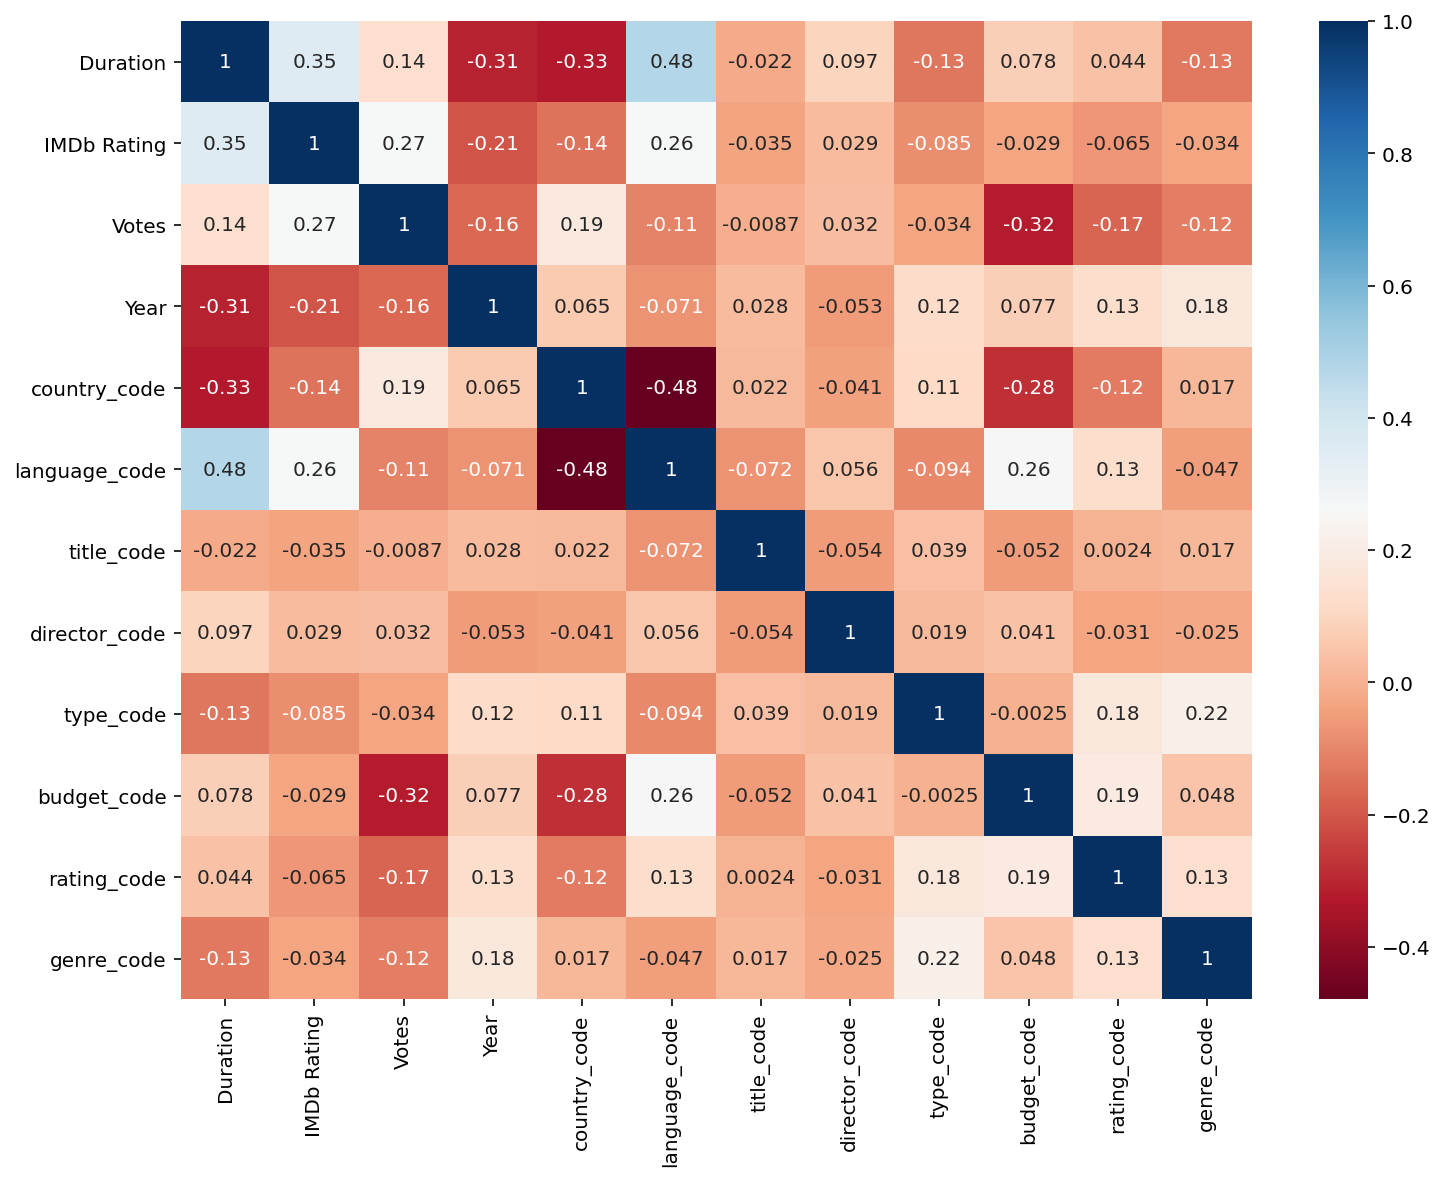

In [ ]:
from matplotlib import cm 
plt.figure(figsize=(12, 9))
corr = result_int.corr(method="pearson")
heat=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=cm.RdBu,annot=True)

**Spearman**

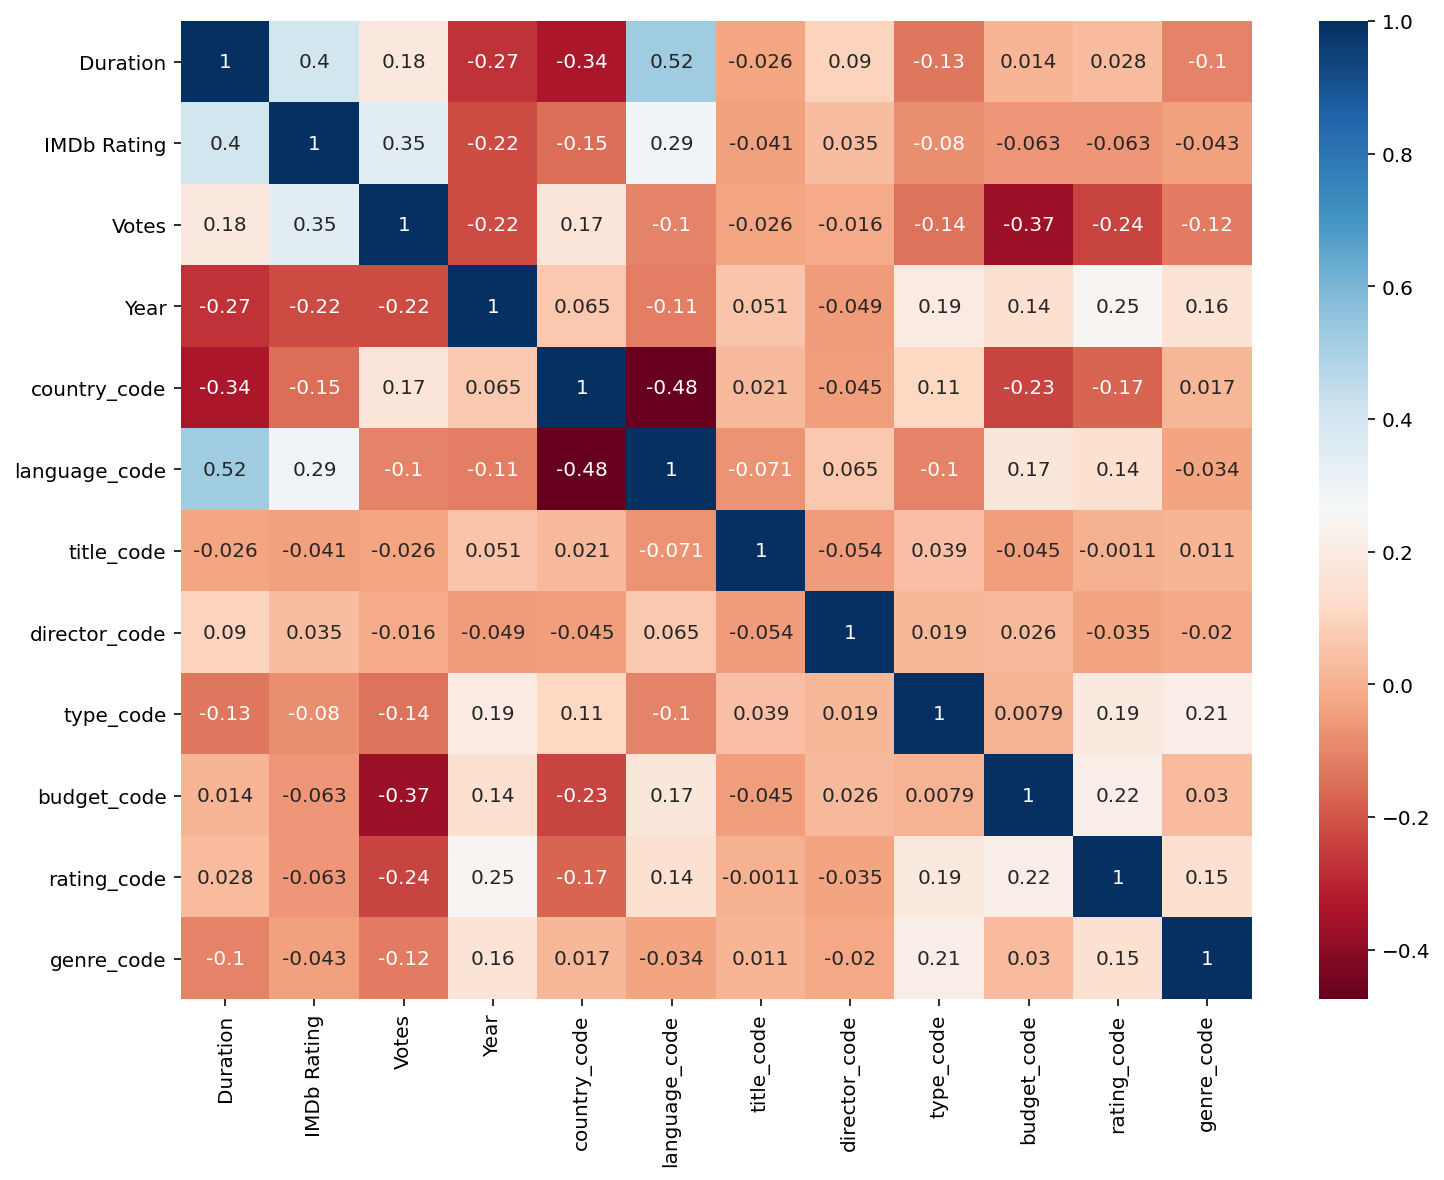

In [ ]:
from matplotlib import cm 
plt.figure(figsize=(12, 9))
corr = result_int.corr(method="spearman")
heat=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=cm.RdBu,annot=True)

## Machine Learning Models



### Unsupervized Models - Recommendation

In here, in order to use the Genre, Cast and Description columns in our machine learning model, we implemented count vectorizer. By using count vectorizer, we increased the dimentionality of our dataframe to analyze that columns. More detailed information about count vectorizer will be given in the knn part.               
By also using these 3 columns, the clusters which are visualized by the scatter plot, separated more distinguishably. Therefore it is indicating that using genre, cast and description features resulted in better seperation of clusters. Also it can be inferred that, these three columns are important for detecting the similar movies and tv shows.

In [ ]:
moviess = result.copy()
moviess["Genre"] =moviess["Genre"].str.replace(",", "")
moviess["Genre"] =moviess["Genre"].str.replace("&", "")
moviess["Cast"] = moviess["Cast"].str.replace(","," ")
moviess["Description"]

import re
def remove_non_alpha(s):
  # removing non-alphanumeric chars
  s = re.sub ('[\W]+', ' ', s.lower())
  return s

moviess["Cast"] =moviess["Cast"].apply(remove_non_alpha)
moviess["Description"]= moviess["Description"].apply(remove_non_alpha)
moviess["Genre"]  = moviess["Genre"].apply(remove_non_alpha)

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

def remove_stop_words(s):
  return " ".join([item for item in s.split() if item not in stop])

moviess["Cast"] = moviess["Cast"].apply(remove_stop_words)
moviess["Description"] = moviess["Description"].apply(remove_stop_words)
moviess["Genre"] = moviess["Genre"].apply(remove_stop_words)

from sklearn.feature_extraction.text import CountVectorizer

# creating the vectorizer
vectorizerr = CountVectorizer()

# extracting input and output
XX = vectorizerr.fit_transform(moviess["Cast"])
XX_a = vectorizerr.fit_transform(moviess["Description"])
XX_b = vectorizerr.fit_transform(moviess["Genre"])
XX.shape
XX_a.shape
XX_b.shape

dfcc = moviess.copy()
abb =pd.concat([dfcc.reset_index(), pd.DataFrame(XX.todense())],axis = 1)
bcc = pd.concat([abb.reset_index(), pd.DataFrame(XX_a.todense())],axis = 1)
cdd = pd.concat([bcc, pd.DataFrame(XX_b.todense())],axis = 1)

framee =pd.merge(left=result_int, right=cdd, left_on='Title', right_on='Title')
framee = framee.drop(["IMDb Title ID", "Duration_y", "Country", "Language", "Director", "Description", "IMDb Rating_y", "Votes_y", "Budget","Type","Cast","Year_y","Rating","Genre","index","level_0"],axis = 1)
#framee['IMDB_label'] = label_list
print(framee.head(2))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
             Title  Duration_x  IMDb Rating_x  Votes_x  ...  39  40  41  42
0  Sherlock Holmes         116            6.4      313  ...   0   0   0   0
1        Leap Year          56            6.1      268  ...   0   0   0   0

[2 rows x 20102 columns]


#### K-means

K-means is a unsupervised clustering algorithm. We perform k-means clustering in order to cluster similar movie and tv shows together.
Before performing the k-means clustering, we performed elbow method to find the optimum number of clusters for our data.
According to Elbow method, the optimum number of clusters is nearly 10. The number of clusters can be increased If we want more clusters that contain less films. In our project we used the optimum number of clusters that is recommended by elbow method which is nearly 10.

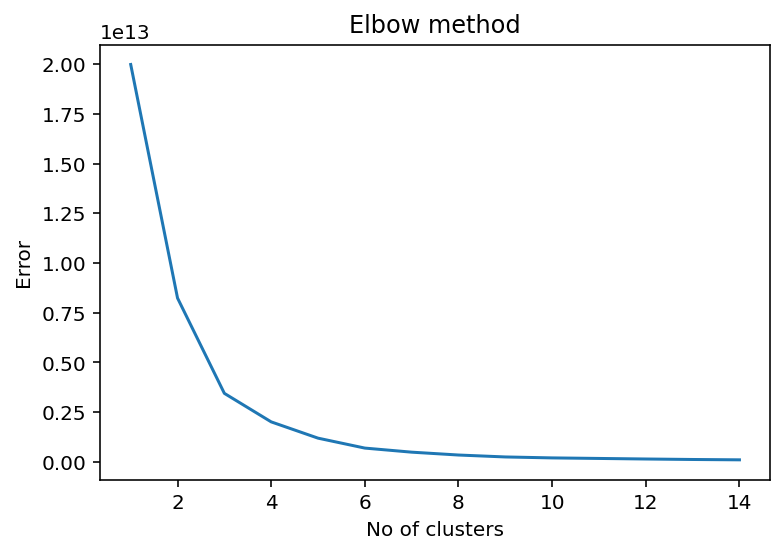

In [ ]:
Error =[]
from sklearn.cluster import KMeans
x_ = framee.iloc[:, 1:20102].values
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i).fit(x_)
    kmeans.fit(x_)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 15), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

We performed k-means clustering and according to elbow method, we chose the number of clusters as 10. From k-means clustering we get an array (y_kmeans10) that stores the clusters of the films respectively.

In [ ]:

import numpy
from sklearn.cluster import KMeans
x = result_int.iloc[:, 1:20102].values
kmeans10 = KMeans(n_clusters=10)
y_kmeans10 = kmeans10.fit_predict(x)
centers = kmeans10.cluster_centers_

y_kmeans10

array([9, 9, 9, ..., 9, 9, 9], dtype=int32)

We performed Principle Component Analysis to reduce the dimensionality of the data, in order to visualize our k-means clustering result and show the results of the k-means on a 2D scatter plot. 

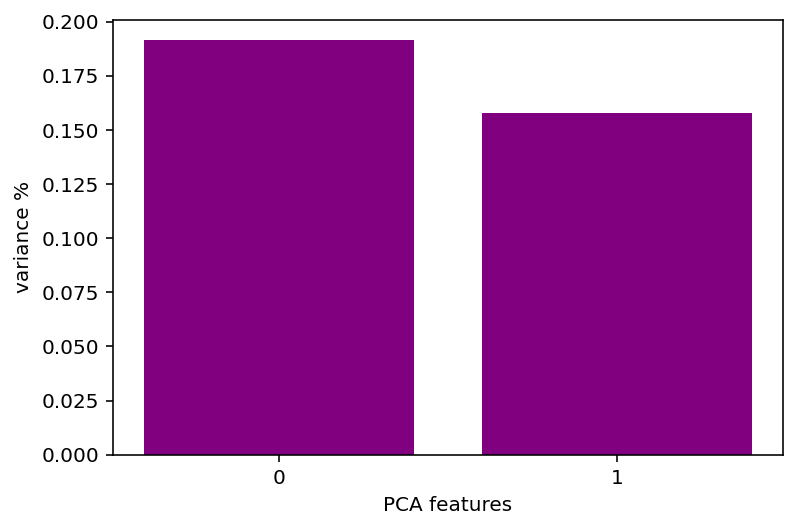

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
xx = result_int.iloc[:, 1:20102].values
X_std = StandardScaler().fit_transform(xx)
# Create a PCA instance: pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='purple')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

We used the principle components for visualizing our data in two dimension by scatter plot. At first look its hard to see all of the clusters but also some of them are distinguishable.

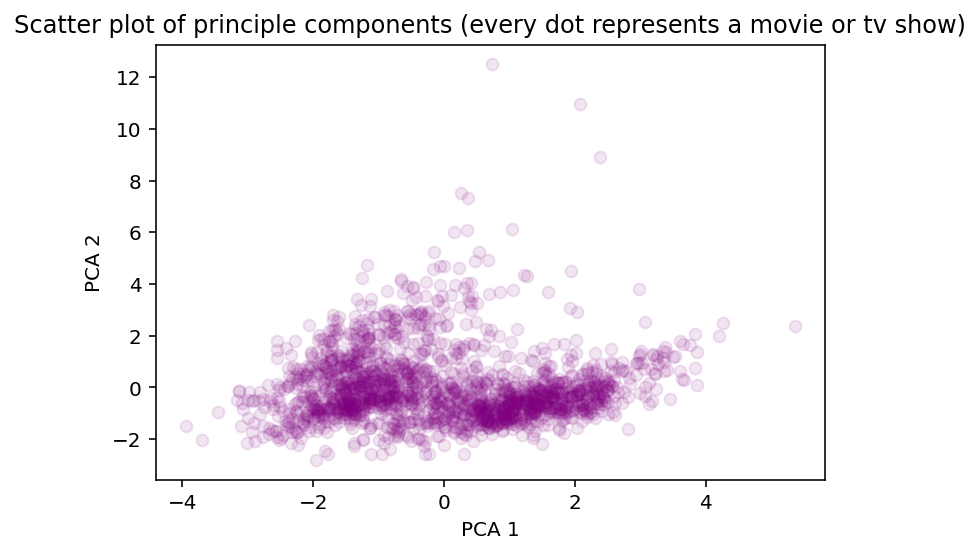

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='purple')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Scatter plot of principle components (every dot represents a movie or tv show)")
plt.show()

We showed the clusters on the scatter plot. K-means clustering algorithm tries to make the intra-cluster data points as similar as possible while also keeping the clusters as far as possible and it tries to separate the clusters spherically. Therefore, it resulted in the figure below. Every color represents one cluster and every dot represents one movie or tv show.

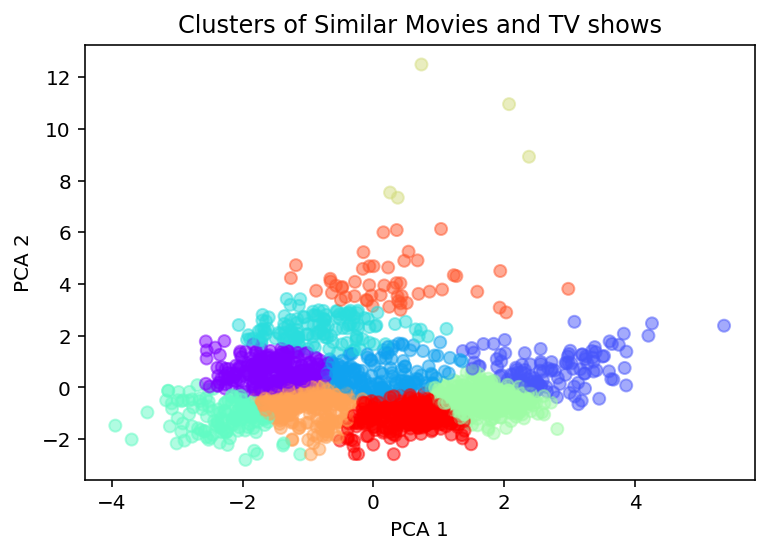

In [ ]:
_x_ = PCA_components.iloc[:, [0,1]].values
kmeans10 = KMeans(n_clusters=10)
y_kmeans10 = kmeans10.fit_predict(_x_)
kmeans10.cluster_centers_
plt.scatter(_x_[:,0], _x_[:,1], c=y_kmeans10, cmap='rainbow', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Clusters of Similar Movies and TV shows")
plt.show()

#### Cosine Similarity

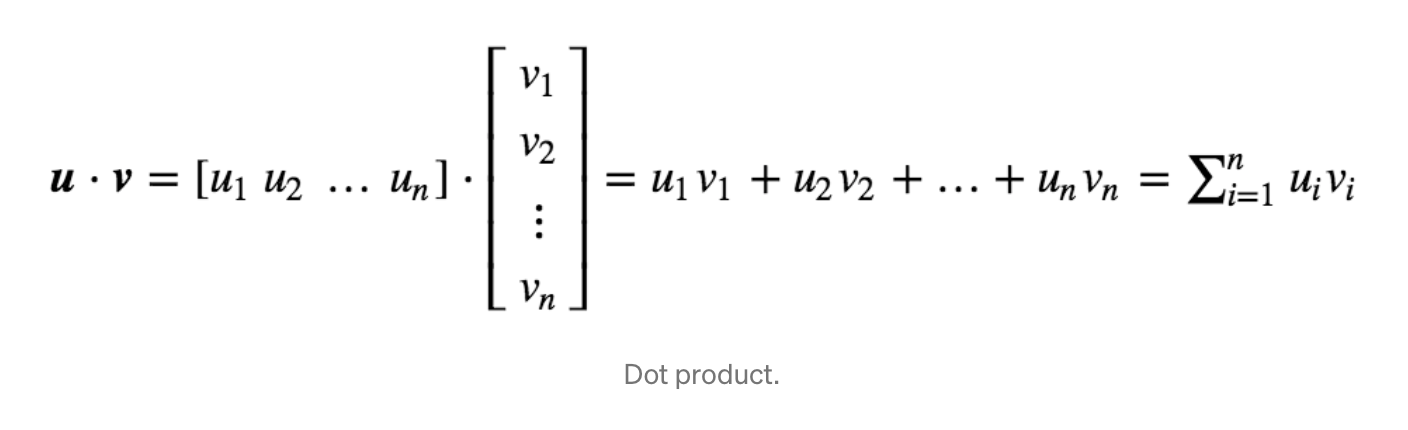

Above, we have the formula of the dot product which is very important when defining a similarity. Because while constructing the similarity we only have to importants facts between to vectors u and v, one is the ratio between these to vectors dot product and second one is the product of their magnitudes.

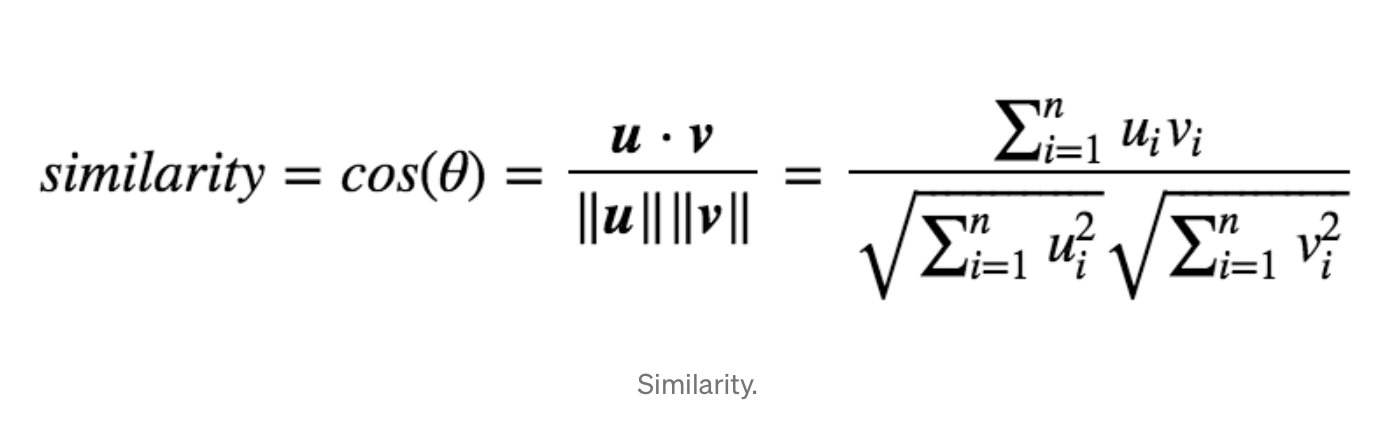

By these two facts and the similarity formula above, we can see that  the similarity result will be equal to 1 if the two vectors are exactly the same and it will be 0 if the two are orthogonal to each other. So what im trying to tell is, the cosine similarity is a number between 0 and 1 and the number will change depending one how two movies or tv shows are similar to each other.

In cosine similarity, for each row based on their Title we put 10 columns (Duration, Country, Language, Director, Description, IMDb Rating, Cast, Year, Rating, Genre) into one column ("All Columns") to represent our bag of words. We deleted all commas and dots because we don't want them in count for not effecting the result. Also we changed the type of IMDb Rating from double to integer for a better performance on the similarity.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cosine_result=result.copy()
cosine_result['Description']=cosine_result['Description'].str.replace(',','').str.replace('.', '').str.lower()
cosine_result['Cast']=cosine_result['Cast'].str.replace(',','').str.replace('.', '').str.lower()
cosine_result['Genre']=cosine_result['Genre'].str.replace(',','').str.lower()
cosine_result['Language']=cosine_result['Language'].str.replace(',','')
cosine_result['IMDb Rating']=cosine_result['IMDb Rating'].astype(int)
cosine_result['IMDb Rating']=cosine_result['IMDb Rating'].astype(str)
cosine_result['Year']=cosine_result['Year'].astype(str)
cosine_result['Duration']=cosine_result['Duration'].astype(str)
cosine_result['Rating']=cosine_result['Rating'].astype(str)

def combine_columncontent(row):
    return row['Duration'] +  " " + row['Country'] + " " + row['Language'] + " " + row['Director'] + " " +row['Description']+ " " +row['IMDb Rating']+ " " +row['Cast']+ " " +row['Year']+ " " +row['Rating']+ " " +row['Genre']       


cosine_result['All Columns'] = cosine_result.apply(combine_columncontent, axis=1)
count_matrix = cv.fit_transform(cosine_result['All Columns'])

cos_sim = cosine_similarity(count_matrix)
cosine_result.head(2)

,IMDb Title ID,Title,Duration,Country,Language,Director,Description,IMDb Rating,Votes,Budget,Type,Cast,Year,Rating,Genre,All Columns
0,tt0007338,Sherlock Holmes,116,USA,English,Arthur Berthelet,when a couple of swindlers hold young alice fa...,6,313,No Budget,Movie,robert downey jr jude law rachel mcadams mark ...,2009,PG-13,action & adventure comedies,116 USA English Arthur Berthelet when a couple...
5,tt0012382,Leap Year,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle",a young man heir to his misogynistic and milli...,6,268,No Budget,Movie,amy adams matthew goode adam scott john lithgo...,2010,PG,comedies romantic movies,"56 USA English James Cruze, Roscoe 'Fatty' Arb..."


Lets look our Similarity Matrix. The matrix is symmetrical because the similarity between A and B is equal also as the similarity in B and A. Also, here diagonal numbers are 1, as expected, because every content (movie and tv) are identical to itself.

In [ ]:
cos_sim

array([[1.        , 0.18588507, 0.15927283, ..., 0.20486647, 0.08115343,
        0.24679185],
       [0.18588507, 1.        , 0.21612702, ..., 0.08910122, 0.08470927,
        0.12122604],
       [0.15927283, 0.21612702, 1.        , ..., 0.11909827, 0.1132277 ,
        0.15191091],
       ...,
       [0.20486647, 0.08910122, 0.11909827, ..., 1.        , 0.16182268,
        0.1447386 ],
       [0.08115343, 0.08470927, 0.1132277 , ..., 0.16182268, 1.        ,
        0.08600261],
       [0.24679185, 0.12122604, 0.15191091, ..., 0.1447386 , 0.08600261,
        1.        ]])

After that step, we will create a series of Titles with assigned numbered indexes to pair them with the ones in similarity matrix. Create a score based on their similarity and order them as the top to the least similar ones. Further, we eliminate the first value of the similartiy list for not returning the same content as user entered. So at the end as we take a movie or tv show title as an input, it will reccomend the top 5 similar scored ones by their features we added above (all columns).

In [ ]:
features = cosine_result[['Title']].reset_index()

def recommend(movie): 
    
    content_title = features[features['Title'] == movie].index[0] 
    features.sort_index(inplace=True)
    
    sim_scores = pd.Series(cos_sim[content_title]).sort_values(ascending=False) 
  
    simbtw_content = pd.DataFrame({ 'Score' : sim_scores[1:100]}).reset_index() 
    simbtw_content = simbtw_content.merge(features) 
    simbtw_content = simbtw_content[['Title','Score']] 
    
    return simbtw_content

Now let's write our movie we wanted to get recommended and see the first 5  similar movies.

In [ ]:
recommend('Sherlock Holmes').head()

,Title,Score
0,House of Cards,0.357075
1,Verónica,0.349131
2,Up in the Air,0.346790
3,Ip Man,0.329673
4,Metro,0.327140


### Supervized Models - Classification and Regression

We implement some classification and regression algorithms to predict the IMDb rating of a film.

#### Classification Models

##### Random Forest Classification

For classification, we select the label as the IMDb ratings to predict. But in classification, it can predict descrete values. Therefore we seperate IMDb ratings into 4 discrete category.

In [ ]:
label_list = []
for i in range(len(result)):
  if result.iloc[i,7] <= 5.0:
    label_list.append(int(0))
  elif result.iloc[i,7] > 5.0 and result.iloc[i,7] <=7.0:
    label_list.append(int(1))
  elif result.iloc[i,7] > 7.0 and result.iloc[i,7] < 8.0:
    label_list.append(int(2))
  elif result.iloc[i,7] >= 8.0 and result.iloc[i,7] <=10.0:
    label_list.append(int(3))
result_int_label = result_int.copy()
result_int_label['IMDB_label'] = label_list

After we create our label that have discrete IMDb values, we performed Random Forest Classification. Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. In the cell below, its determining the labels and features. X_ is representing the features and y_ is representing the label column.

In [ ]:
X_ = result_int_label.iloc[:, [1,3,4,5,6,7,8,9,10,11,12]].values
y_ = result_int_label.iloc[:, 13].values
result_int_label.head(2)

,Title,Duration,IMDb Rating,Votes,Year,country_code,language_code,title_code,director_code,type_code,budget_code,rating_code,genre_code,IMDB_label
0,Sherlock Holmes,116,6.4,313,2009,213.0,19.0,1285.0,146.0,0.0,251.0,5.0,8.0,1
5,Leap Year,56,6.1,268,2010,213.0,19.0,808.0,582.0,0.0,251.0,4.0,123.0,1


In the two cells below, our data was splitted into test and train. Then, Random Forest classifier was implemented.

In [ ]:
from sklearn.model_selection import train_test_split
Xtrainn, Xtestt, ytrainn, ytestt = train_test_split(X_, y_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(Xtrainn, ytrainn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In below you can see the results after using our Random Forest Classifier on the test data. Accuracy is about 0.61. To improve our algorithm's performance and increase the accuracy, we used different methods such as using hyperparameters and using some important feautures too. 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
ypredd_test = rf.predict(Xtestt)
print('Test Confusion Matrix: ')
print(confusion_matrix(ytestt, ypredd_test))
print('')
print('')
print('Test Classification report:')
print(classification_report(ytestt, ypredd_test))

rf_acc = accuracy_score(ytestt, ypredd_test)
print("Random Forest Accuracy:"+str(rf_acc))

Test Confusion Matrix: 
[[ 33  80   0   0]
 [ 25 208  10   0]
 [  0  51  18   1]
 [  0   9   7   3]]


Test Classification report:
              precision    recall  f1-score   support

           0       0.57      0.29      0.39       113
           1       0.60      0.86      0.70       243
           2       0.51      0.26      0.34        70
           3       0.75      0.16      0.26        19

    accuracy                           0.59       445
   macro avg       0.61      0.39      0.42       445
weighted avg       0.58      0.59      0.55       445

Random Forest Accuracy:0.5887640449438202


Here we identified the most important features in our dataset for Random Forest Classifier. That means, these features are the most significant features that impact the accuracy of our macnine algorithm. Therefore, it is useful to know these important features in order to get a better accuracy value from our clasification algorithm.

[('Duration', 0.185), ('Title', 0.135), ('language_code', 0.118), ('country_code', 0.117), ('budget_code', 0.102), ('IMDb Rating', 0.085), ('Year', 0.077), ('Votes', 0.063), ('director_code', 0.054), ('type_code', 0.054), ('title_code', 0.011)]
Feature: Duration   Importance: 0.185
Feature: Title   Importance: 0.135
Feature: language_code   Importance: 0.118
Feature: country_code   Importance: 0.117
Feature: budget_code   Importance: 0.102
Feature: IMDb Rating   Importance: 0.085
Feature: Year   Importance: 0.077
Feature: Votes   Importance: 0.063
Feature: director_code   Importance: 0.054
Feature: type_code   Importance: 0.054
Feature: title_code   Importance: 0.011


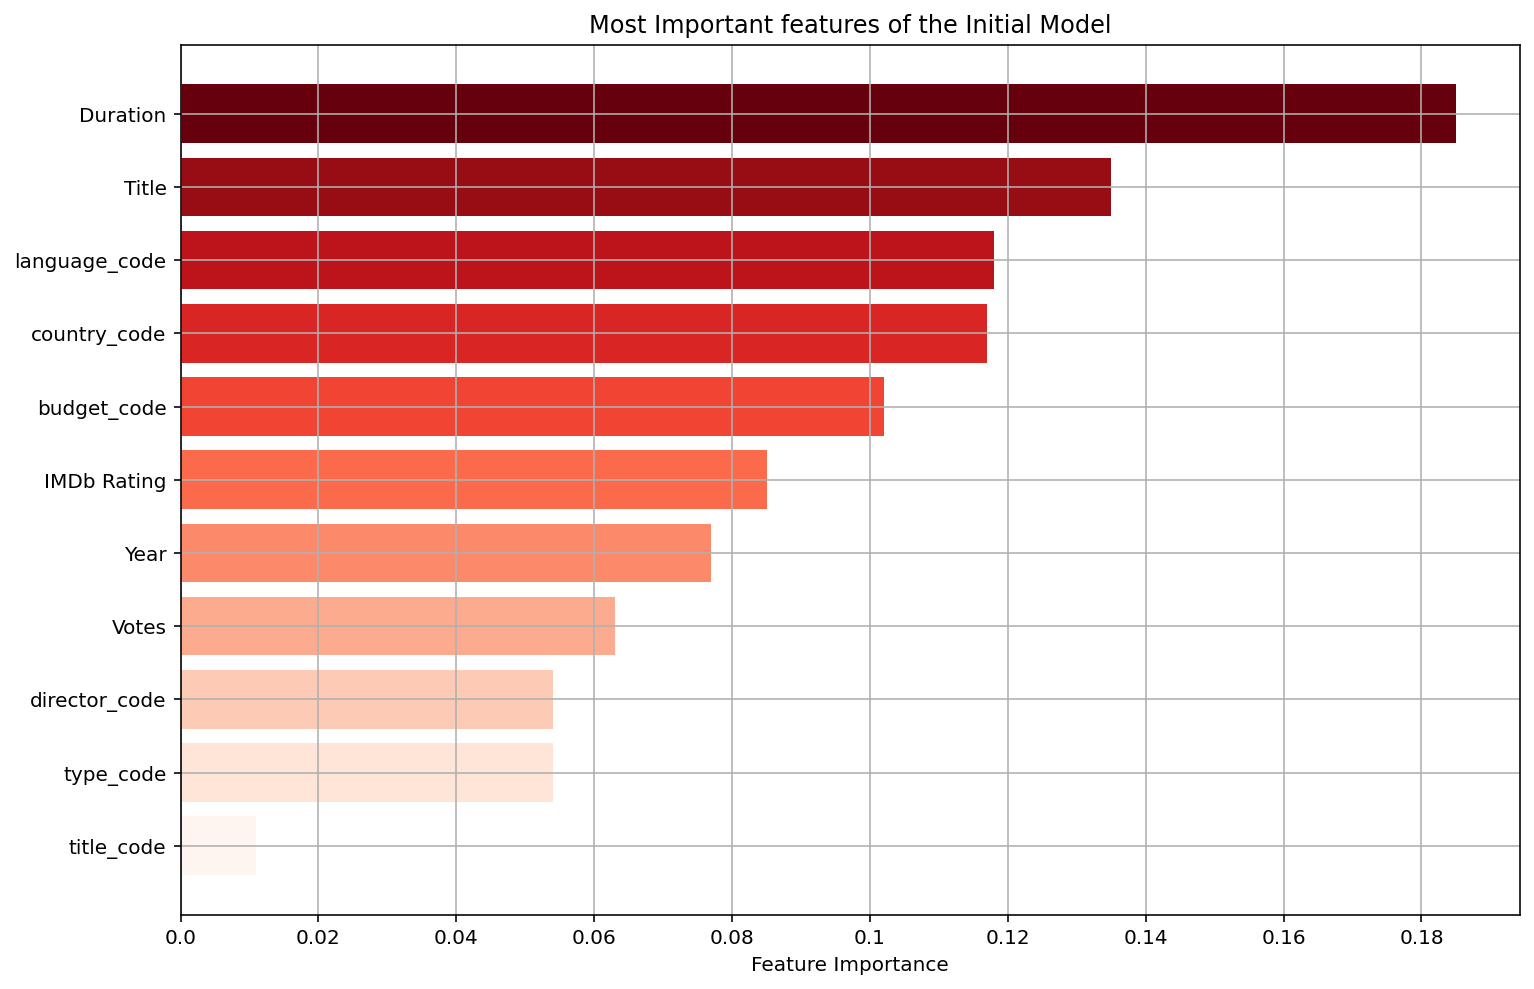

In [ ]:
from matplotlib import cm
# your code
feature_list = result_int_label.columns
importances = list(rf.feature_importances_)
feature_importance = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)
print(feature_importances)
for pair in feature_importances[:25]:
  print("Feature: {:2}   Importance: {}".format(*pair))
feat = feature_importances[:25]
listt = []
for i in range(len(feat)):
  listt.append(feat[i][0]) 
imp = [] 
for i in range(len(feat)):
  imp.append(feat[i][1]) 
listtt=np.arange(start=0,stop=0.183,step=0.02)
c = plt.cm.Reds_r(np.linspace(0,1,len(feat)))
fig, ax =plt.subplots(figsize=(12,8))
ax.set_xticks(listtt)
ax.set_xticklabels(listtt)
ax.invert_yaxis()
plt.barh(listt,imp,color=c)
#plt.grid()
ax.grid(zorder=0)
plt.title('Most Important features of the Initial Model')
plt.xlabel('Feature Importance')
plt.show()

Hyperparametrically tuned parameters play a significant role in producing high accuracy results when using Random Forestclassifier. In this part, the classification result under the optimal parameters of Random Forest was performed. Therefore, the accuracy value that obtained from random forest was increased.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion' :['entropy'],'min_samples_split': [2,5,10],'n_estimators': [100, 200, 300, 400, 600]}
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
rf_grid.fit(Xtrainn, ytrainn)
rf_grid.best_params_
grid_preds = rf_grid.predict(Xtestt)
acc_hyp = accuracy_score(ytestt, grid_preds)
acc_hyp


0.597752808988764

In here, we used the dataframe "framee" which is contructed by implementation of counter vectorizer and this dataframe includes Genre, Cast and Description features too. More detailed information about implementation of counter vectorizer will be given in the knn part.               
By also using these 3 columns, the accuracy value increased and reached to about 0.68. Therefore it can be inferred that; genre, cast and description are important features to determine the IMDb rate of a movie or tv show.

In [ ]:
framee['IMDB_label'] = label_list

XX_ = framee.iloc[:, 1:20102].values
yy_ = framee.iloc[:, 20102].values
result_int_label.head(2)
from sklearn.model_selection import train_test_split
XXtrainn, XXtestt, yytrainn, yytestt = train_test_split(XX_, yy_)

from sklearn.ensemble import RandomForestClassifier
rff = RandomForestClassifier(n_estimators=100, random_state=42)
rff.fit(XXtrainn, yytrainn)
ypredd_testt = rff.predict(XXtestt)

print('Test Confusion Matrix: ')
print(confusion_matrix(yytestt, ypredd_testt))
print('')
print('')
print('Test Classification report:')
print(classification_report(yytestt, ypredd_test))

rf_acc_cv = accuracy_score(yytestt, ypredd_testt)

'''
from sklearn.model_selection import GridSearchCV
param_gridd = {'criterion' :['entropy'],'min_samples_split': [2,5,10],'n_estimators': [100, 200, 300, 400, 600]}
rf_gridd = GridSearchCV(estimator=rff, param_grid=param_gridd, cv= 5)
rf_gridd.fit(XXtrainn, yytrainn)
rf_gridd.best_params_
grid_predss = rf_gridd.predict(XXtestt)
acc_hyp_cv = accuracy_score(yytestt, grid_predss)
print(acc_hyp_cv)
'''
#I decided not to use the part above (which is commented), because it takes to much time to work
print("Random Forest Accuracy:"+str(rf_acc_cv))

Test Confusion Matrix: 
[[ 37  61   0   0]
 [  0 267   0   0]
 [  0  59   5   0]
 [  0  12   4   0]]


Test Classification report:
              precision    recall  f1-score   support

           0       0.21      0.12      0.15        98
           1       0.61      0.79      0.69       267
           2       0.26      0.14      0.18        64
           3       0.00      0.00      0.00        16

    accuracy                           0.52       445
   macro avg       0.27      0.26      0.26       445
weighted avg       0.45      0.52      0.47       445

Random Forest Accuracy:0.6943820224719102


##### **KNN**




Before we start KNN, we arranged classification method in Duration, Votes and Year.

We classify the Imdb rating which our "label" in machine learning.


*   Classification is done my the Imdb Ratings


*   If it is lower then 5 it is bad movie/tv series


*   If it is between 5 and 7 it is normal movie/tv series
*   If it is between 7 and 8 it is good movie/tv series


*   If it is between 8 and 10 it is considered as legendary movie/tv series
  


In [ ]:
def ımdbclasification(row):
    if  row <= 5.0:
      return 0
    elif row > 5.0 and row <= 7.0:
      return 1;
    elif row > 7.0 and row < 8.0:
      return 2;
    elif row >= 8.0 and row <= 10.0:
      return 3;
result["label"] = result["IMDb Rating"].apply(ımdbclasification)
result.head(5)

,IMDb Title ID,Title,Duration,Country,Language,Director,Description,IMDb Rating,Votes,Budget,Type,Cast,Year,Rating,Genre,label
0,tt0007338,Sherlock Holmes,116,USA,English,Arthur Berthelet,When a couple of swindlers hold young Alice Fa...,6.4,313,No Budget,Movie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...",2009,PG-13,"Action & Adventure, Comedies",1
5,tt0012382,Leap Year,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle","A young man, heir to his misogynistic and mill...",6.1,268,No Budget,Movie,"Amy Adams, Matthew Goode, Adam Scott, John Lit...",2010,PG,"Comedies, Romantic Movies",1
6,tt0013704,The Trap,60,USA,English,Robert Thornby,A miner's happiness is destroyed when a rival ...,6.0,118,No Budget,Movie,"T.I., Mike Epps, Loretta Devine, Queen Latifah...",2017,TV-MA,Comedies,1
13,tt0015684,The Circle,71,USA,English,Frank Borzage,"Elizabeth Cheney has a wealthy husband, social...",6.3,491,No Budget,TV Show,Michelle Buteau,2020,TV-MA,Reality TV,1
17,tt0016123,The Monster,86,USA,English,Roland West,A meek clerk who doubles as an amateur detecti...,6.2,906,No Budget,Movie,"Zoe Kazan, Ella Ballentine, Aaron Douglas, Chr...",2016,R,"Horror Movies, Independent Movies",1


In [ ]:
bad_content=0
normal_content=0
good_content=0
legend_content=0
for i in result.index:
  if result["label"][i]==0:
    bad_content=bad_content+1
  elif result["label"][i]==1:
    normal_content=normal_content+1    
  elif result["label"][i]==2:
    good_content=good_content+1
  elif result["label"][i]==3:
    legend_content=legend_content+1
  
  i=i+1
print("Number of bad content in netflix: ",bad_content)  
print("Number of normal content in netflix: ",normal_content)  
print("Number of good content in netflix: ",good_content)  
print("Number of legendary content in netflix: ",legend_content)  
 
 

Number of bad content in netflix:  403
Number of normal content in netflix:  1012
Number of good content in netflix:  288
Number of legendary content in netflix:  74







*  Create another clasification by years 


*   If it is created before the 50's it is too old movie/tv series


*  If it is created between 50's and 80's it is old movie/tv series
*  If it is created between 80's and 00's it is still old but a little bit


*  If it is created between 00's and 20's it is considered as new 











In [ ]:
def yearclasification(row):
    if  row <= 1950:
      return 0
    elif row > 1950 and row <= 1980:
      return 1;
    elif row > 1980 and row < 2000:
      return 2;
    elif row >= 2000 and row <= 2020:
      return 3;
#result["year"].astype(int)
result["year_classification"] = result["Year"].apply(yearclasification)

Printing the number of year clasification

In [ ]:
yc_0=0
yc_1=0
yc_2=0
yc_3=0
for i in result.index:
  if result["year_classification"][i]==0:
    yc_0=yc_0+1
  elif result["year_classification"][i]==1:
    yc_1=yc_1+1    
  elif result["year_classification"][i]==2:
    yc_2=yc_2+1
  elif result["year_classification"][i]==3:
    yc_3=yc_3+1
  
  i=i+1
print("Too old movies  ",yc_0)  
print("Old movies and tv series ",yc_1)  
print("A bit old movies and tv series ",yc_2)  
print("The recent movies and tv series: ",yc_3)  

Too old movies   2
Old movies and tv series  34
A bit old movies and tv series  75
The recent movies and tv series:  1666




*  We divided the contents by duration which is 


*   If it is less then 60 minutes short movie/ tv series


*  If it is between 60 and 120 minutes normal duration movie/tv series
*  If it is more than 2 hours it is long duration movie/tv series







In [ ]:
def durationclasification(row):
    if  row <= 60:
      return 0
    elif row > 60 and row <= 120:
      return 1;
    elif row > 120 :
      return 2;
    
#result["year"].astype(int)
result["duration_classification"] = result["Duration"].apply(durationclasification)
result.head(2)

,IMDb Title ID,Title,Duration,Country,Language,Director,Description,IMDb Rating,Votes,Budget,Type,Cast,Year,Rating,Genre,label,year_classification,duration_classification
0,tt0007338,Sherlock Holmes,116,USA,English,Arthur Berthelet,When a couple of swindlers hold young Alice Fa...,6.4,313,No Budget,Movie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...",2009,PG-13,"Action & Adventure, Comedies",1,3,1
5,tt0012382,Leap Year,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle","A young man, heir to his misogynistic and mill...",6.1,268,No Budget,Movie,"Amy Adams, Matthew Goode, Adam Scott, John Lit...",2010,PG,"Comedies, Romantic Movies",1,3,0




*   Votes classification among the movies and series


*  When we check the data we see that there is a lot if distribution of votes among the contents so we divided them into 4 different classes
*  Firstly, if the given movie take less then 1000 votes it is low voted movie/tv series


*   If it is voted between 1000 and 5000 people it is consiered as medium level 
*   If it is voted between 5000 and 10000 people, it is closer to high voted  movie but still between as medium 


*   If it is voted more then  10.000 people it is also high level voted amoungs the people 









In [ ]:
def votes(row):
  if row <= 1000:
    return 0
  elif row > 1000 and row <= 5000:
    return 1;
  elif row > 5000 and row <= 10000:
    return 2;
  else :
    return 3
result["votes_class"] = result["Votes"].apply(votes)
result["votes_class"]

0       0
5       0
6       0
13      0
17      0
       ..
2327    0
2328    0
2329    0
2330    1
2331    0
Name: votes_class, Length: 1777, dtype: int64

In [ ]:
result_int.head()

,Title,Duration,IMDb Rating,Votes,Year,country_code,language_code,title_code,director_code,type_code,budget_code,rating_code,genre_code
0,Sherlock Holmes,116,6.4,313,2009,213.0,19.0,1285.0,146.0,0.0,251.0,5.0,8.0
5,Leap Year,56,6.1,268,2010,213.0,19.0,808.0,582.0,0.0,251.0,4.0,123.0
6,The Trap,60,6.0,118,2017,213.0,19.0,1589.0,1186.0,0.0,251.0,9.0,92.0
13,The Circle,71,6.3,491,2020,213.0,19.0,1455.0,455.0,1.0,251.0,9.0,230.0
17,The Monster,86,6.2,906,2016,213.0,19.0,1542.0,1201.0,0.0,251.0,6.0,187.0


In [ ]:
#All information we need to have in order to use Knn 
# This contains for each movies, classfication for each column
all_numbers = result_int.copy()
all_numbers["votes_class"] =result["votes_class"]
all_numbers["label"] = result["label"]
all_numbers["duration_class"] = result["duration_classification"]
all_numbers["year_class"] =result["year_classification"]
all_numbers
all_numbers.drop("Duration",axis = 1,inplace = True)
all_numbers.drop("Votes",axis = 1,inplace = True)
all_numbers.drop("Year",axis = 1,inplace = True)
all_numbers.head(2)


,Title,IMDb Rating,country_code,language_code,title_code,director_code,type_code,budget_code,rating_code,genre_code,votes_class,label,duration_class,year_class
0,Sherlock Holmes,6.4,213.0,19.0,1285.0,146.0,0.0,251.0,5.0,8.0,0,1,1,3
5,Leap Year,6.1,213.0,19.0,808.0,582.0,0.0,251.0,4.0,123.0,0,1,0,3


**Logistic Regression and Counter Vectorizer**

In order to analize string values such as Genre, Cast and Description of the data we need to approach this problem with the help of the logistic regression and counter vectorizer

In this problem first we replace ","  with empty cell("") in description, in order to inhibit any problem.
Then we are going to use library called `nltk` in proprocessing.
This library contains most common word in english languague, and discard them in our list to evaluate this function better.



In [ ]:
movies = result.copy()

movies["Genre"] =movies["Genre"].str.replace(",", "")
movies["Genre"] =movies["Genre"].str.replace("&", "")

movies["Cast"] = movies["Cast"].str.replace(","," ")
movies["Description"]

0       When a couple of swindlers hold young Alice Fa...
5       A young man, heir to his misogynistic and mill...
6       A miner's happiness is destroyed when a rival ...
13      Elizabeth Cheney has a wealthy husband, social...
17      A meek clerk who doubles as an amateur detecti...
                              ...                        
2327    'Chief Daddy' tells the story of billionaire i...
2328    A music shop owner falls in love with a girl f...
2329    The life of Padma Shri winner Chintakindi Mall...
2330    When a young man becomes possessed after playi...
2331    Set 25 years after, Jack is now working as a S...
Name: Description, Length: 1777, dtype: object

This function removies any non-alphanumeric characters in given string

In [ ]:
import re

def remove_non_alpha(s):
  # removing non-alphanumeric chars
  s = re.sub ('[\W]+', ' ', s.lower())

  return s

In [ ]:
movies["Cast"] =movies["Cast"].apply(remove_non_alpha)
movies["Description"]= movies["Description"].apply(remove_non_alpha)
movies["Genre"]  = movies["Genre"].apply(remove_non_alpha)

This function remove the most common word in given dataset

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stop_words(s):
  return " ".join([item for item in s.split() if item not in stop])

In [ ]:
movies["Cast"] = movies["Cast"].apply(remove_stop_words)
movies["Description"] = movies["Description"].apply(remove_stop_words)
movies["Genre"] = movies["Genre"].apply(remove_stop_words)

With the help of the CountVectorizer we are going to have a array of list that contains every string in given 3 list and if we found that string in our label then, it will increment this value by 1, Mostly it is contains binary values such as 1 and 0 but for instance, since in description a given word might occur more than once, there might be different values as 2 or 3.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# creating the vectorizer
vectorizer = CountVectorizer()

# extracting input and output
X = vectorizer.fit_transform(movies["Cast"])
X_a = vectorizer.fit_transform(movies["Description"])
X_b = vectorizer.fit_transform(movies["Genre"])
X.shape
X_a.shape
X_b.shape

(1777, 43)

Merge the previous data which is contains integer values both obtain from classification and encoding, with the new counter vectorizer

In [ ]:
dfc = movies.copy()
ab =pd.concat([dfc.reset_index(), pd.DataFrame(X.todense())],axis = 1)
bc = pd.concat([ab.reset_index(), pd.DataFrame(X_a.todense())],axis = 1)
cd = pd.concat([bc, pd.DataFrame(X_b.todense())],axis = 1)

frame =pd.merge(left=all_numbers, right=cd, left_on='Title', right_on='Title')
frame.head(2)

,Title,IMDb Rating_x,country_code,language_code,title_code,director_code,type_code,budget_code,rating_code,genre_code,votes_class_x,label_x,duration_class,year_class,level_0,index,IMDb Title ID,Duration,Country,Language,Director,Description,IMDb Rating_y,Votes,Budget,Type,Cast,Year,Rating,Genre,label_y,year_classification,duration_classification,votes_class_y,0,1,2,3,4,5,...,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,Sherlock Holmes,6.4,213.0,19.0,1285.0,146.0,0.0,251.0,5.0,8.0,0,1,1,3,0,0,tt0007338,116,USA,English,Arthur Berthelet,couple swindlers hold young alice faulkner ord...,6.4,313,No Budget,Movie,robert downey jr jude law rachel mcadams mark ...,2009,PG-13,action adventure comedies,1,3,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Leap Year,6.1,213.0,19.0,808.0,582.0,0.0,251.0,4.0,123.0,0,1,0,3,1,5,tt0012382,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle",young man heir misogynistic millionaire uncle ...,6.1,268,No Budget,Movie,amy adams matthew goode adam scott john lithgo...,2010,PG,comedies romantic movies,1,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Now named "frame" contains all of the values we need to use in machine learning, but first we need to drop unnecesary columns from it 

In [ ]:
frame =frame.drop(["Title","IMDb Rating_x","index","IMDb Title ID","Duration","Country","Language","Director","Description","IMDb Rating_y","Votes","Budget","Type","Cast","Year","Rating","Genre"],axis = 1)


In [ ]:
frame = frame.drop(["label_x","level_0","label_y","votes_class_y","duration_classification","year_classification"],axis = 1)

Now we are ready to use this values in our Machine Learning model

In [ ]:
frame.head(5)

,country_code,language_code,title_code,director_code,type_code,budget_code,rating_code,genre_code,votes_class_x,duration_class,year_class,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,...,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,213.0,19.0,1285.0,146.0,0.0,251.0,5.0,8.0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,213.0,19.0,808.0,582.0,0.0,251.0,4.0,123.0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,213.0,19.0,1589.0,1186.0,0.0,251.0,9.0,92.0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,213.0,19.0,1455.0,455.0,1.0,251.0,9.0,230.0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,213.0,19.0,1542.0,1201.0,0.0,251.0,6.0,187.0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Accuracy of KNN

* Since we have both classification and encoding in the given data, we can use the knn method in the machine learning.

* First, we take labels for given movies/tv series as combined dataset which will be our Y values


*  And secondly we gave the inputs as X values in the combined dataset values which is contained classication and encoding



> At the end we obtain the accuraccy of the knn in parameter K





---







In [ ]:
y = all_numbers["label"].values
#x = result[["duration_classification","year_classification",]].values  alttaki ile ortak eklememiz lazım
x = frame.values  

In [ ]:
from sklearn.model_selection import train_test_split

# 80% for training and 20% for testing-validation
x_train, x_remaining, y_train, y_remaining = train_test_split(x, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
x_test, x_val, y_test, y_val = train_test_split(x_remaining, y_remaining, test_size=0.50, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
K_range = np.arange(1, 50)
accuracy_list = []

for k in K_range:
  # create a new model with current K
  knn = KNeighborsClassifier(k, metric="euclidean")
  # fit training data
  knn.fit(x_train, y_train)
  # predict the validation data
  y_pred = knn.predict(x_val)
  # obtain the accuracy value
  accuracy = accuracy_score(y_val, y_pred)
  accuracy_list.append(accuracy)


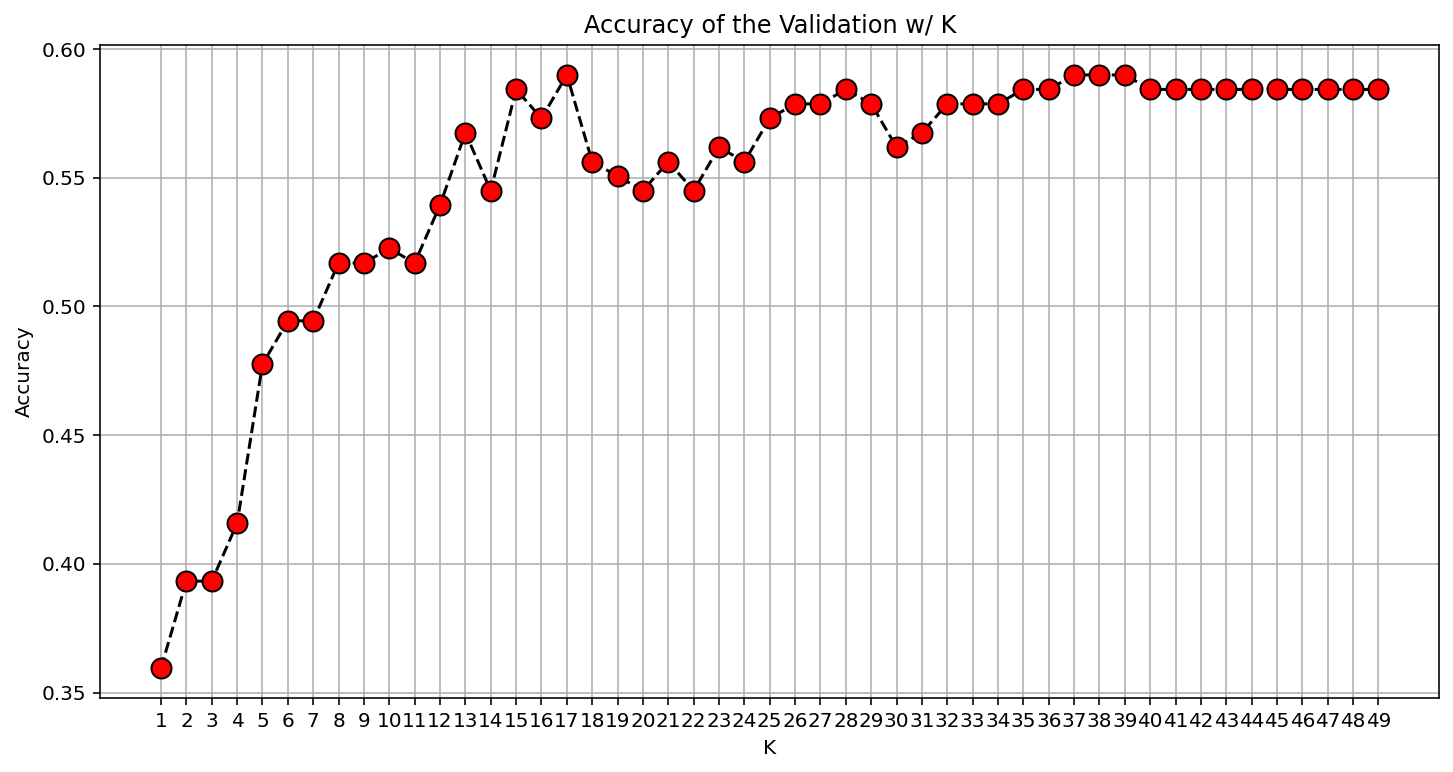

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation w/ K')  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

We see that when k value is incresing from 1 to 17 there is great impact on the accuracy score since we increase the number of neighbor, there is more chance to evaluate more precisely. After 17 still it goes arround similar accuraccy but after certain point it goes as linearly in the K value of 39.

In [ ]:
knn = KNeighborsClassifier(37, metric="euclidean")
# fit training data
knn.fit(x_train, y_train)
# predict the validation data
y_pred = knn.predict(x_test)
# obtain the accuracy value
#knn_best = f"{accuracy_score(y_test, y_pred):.2f}"
knn_best = accuracy_score(y_test, y_pred)
print(knn_best)

0.5730337078651685


Also we try to obtain a accuracy score in default parameter in order to evaluate the difference between random forest and knn

In [ ]:
knn = KNeighborsClassifier(k, metric="euclidean")
# fit training data
knn.fit(x_train, y_train)
# predict the validation data
y_pred = knn.predict(x_test)
# obtain the accuracy value
#knn_def = f"{accuracy_score(y_test, y_pred):.2f}"
knn_def = accuracy_score(y_test, y_pred)
print(knn_def)

0.5786516853932584


#### Regression Models

##### Linear Regression

With this method, we are looking at the relation between x and y ,where y is the dependent variable and x is explanatory variable. This method is used for finding out cause and effect relationship between variables.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=result_int
X = dataset[['Votes','Duration','budget_code']]

 
y = dataset['IMDb Rating']

In [ ]:
#creating test,train variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#use scikit learn to import the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#finds the best value for the intercept and slope, which results in a line that best fits the data,To retrieve the intercept:
print(regressor.intercept_)

4.123656211208546


In [ ]:
#coefficient represent y-intercept and slope of regression line respectively. The bigger the coefficient the correlation between our dependent and independent varibale is higher. As a result IMdb Rating has a higher correlation with duration.Has less interconnection with votes.

coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
Votes,0.000003
Duration,0.015249
budget_code,0.000266


Coefficient represents y-intercept and slope of regression line respectively. The bigger the coefficient the correlation between our dependent and independent varibale is higher. As a result IMdb Rating has a higher correlation with duration.Has less interconnection with votes.

In [ ]:
#y_pred is a array contains all the predicted values for the input values in the X_test series
y_pred = regressor.predict(X_test)

In [ ]:
#To compare the actual output values for X_test with the predicted values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [ ]:
#evaluate the performance of the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8890012030554026
Mean Squared Error: 1.219267015861624
Root Mean Squared Error: 1.104204245536859


MSE is the average of the square of the difference between the observed and predicted values of a variable.MAE is the average of the absolute error values.RMSE is square root of the mean of the squared differences between actual outcomes and predictions.Because of squaring the difference,MSE will almost always be bigger than the MAE. 

In [ ]:

MeanAbsoluteError=metrics.mean_absolute_error(y_test, y_pred)
MeanSquaredError=metrics.mean_squared_error(y_test, y_pred)
RootMeanSquaredError=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['LinearRegression:',''])
t.add_row(['MeanAbsoluteError:', MeanAbsoluteError])
t.add_row(['MeanSquaredError:',MeanSquaredError])
t.add_row(['RootMeanSquaredError:',RootMeanSquaredError])
print(t)

+-----------------------+--------------------+
|   LinearRegression:   |                    |
+-----------------------+--------------------+
|   MeanAbsoluteError:  | 0.8890012030554026 |
|   MeanSquaredError:   | 1.219267015861624  |
| RootMeanSquaredError: | 1.104204245536859  |
+-----------------------+--------------------+


##### Random Forest Regression

Random Forest Regression Model builds multiple desicion trees and combine these desicion trees' predictions as taking their average to make more stable and accurate prediction on dependent variable, which is iMDB ratings on this case. Each tree in a Random Forest learns from a random sample of the training data. In general, as we use more trees the results getting better. However, at some point, training time getting longer and have a negative impact on performances of the other models. Therefore, to avoid the overfitting, we decided number of trees as 100.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = rf.predict(X_test)

rfmse = mean_squared_error(y_test, y_pred)
rfmae = mean_absolute_error(y_test, y_pred)
rfrmse = np.sqrt(rfmse)

print("Mean Absolute Error: {}".format(rfmae))
print("Mean Squared Error: {}".format(rfmse))
print("Root Mean Squared Error: {}".format(rfrmse))

Mean Absolute Error: 0.9482692415730337
Mean Squared Error: 1.413885106586298
Root Mean Squared Error: 1.1890690083364792


##### kNN Regression

kNN Regression Model use k nearest neighbor method just as in the classification, in kNN regression we chose 31 as parameter since 31 is the K value with the lowest error values. We found the best K as determining k range and observing the plot graph of K values in terms of their performances according to their error values.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

K_range = np.arange(1, 40)
error_values = []

for k in K_range:
  knn = KNeighborsRegressor(k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error = mean_squared_error(y_test, y_pred)
  error_values.append(error)

We have obtained almost constant graph for error values after K value passes 20, which means error values remains so close to the value that we obtain in 20 as K gets larger, nevertheless, we chose 31 as parameter since it gives the lowest error values. Also we obtained quite similar plot graphs for MSE and SMSE, so we just showed one of them for representation.

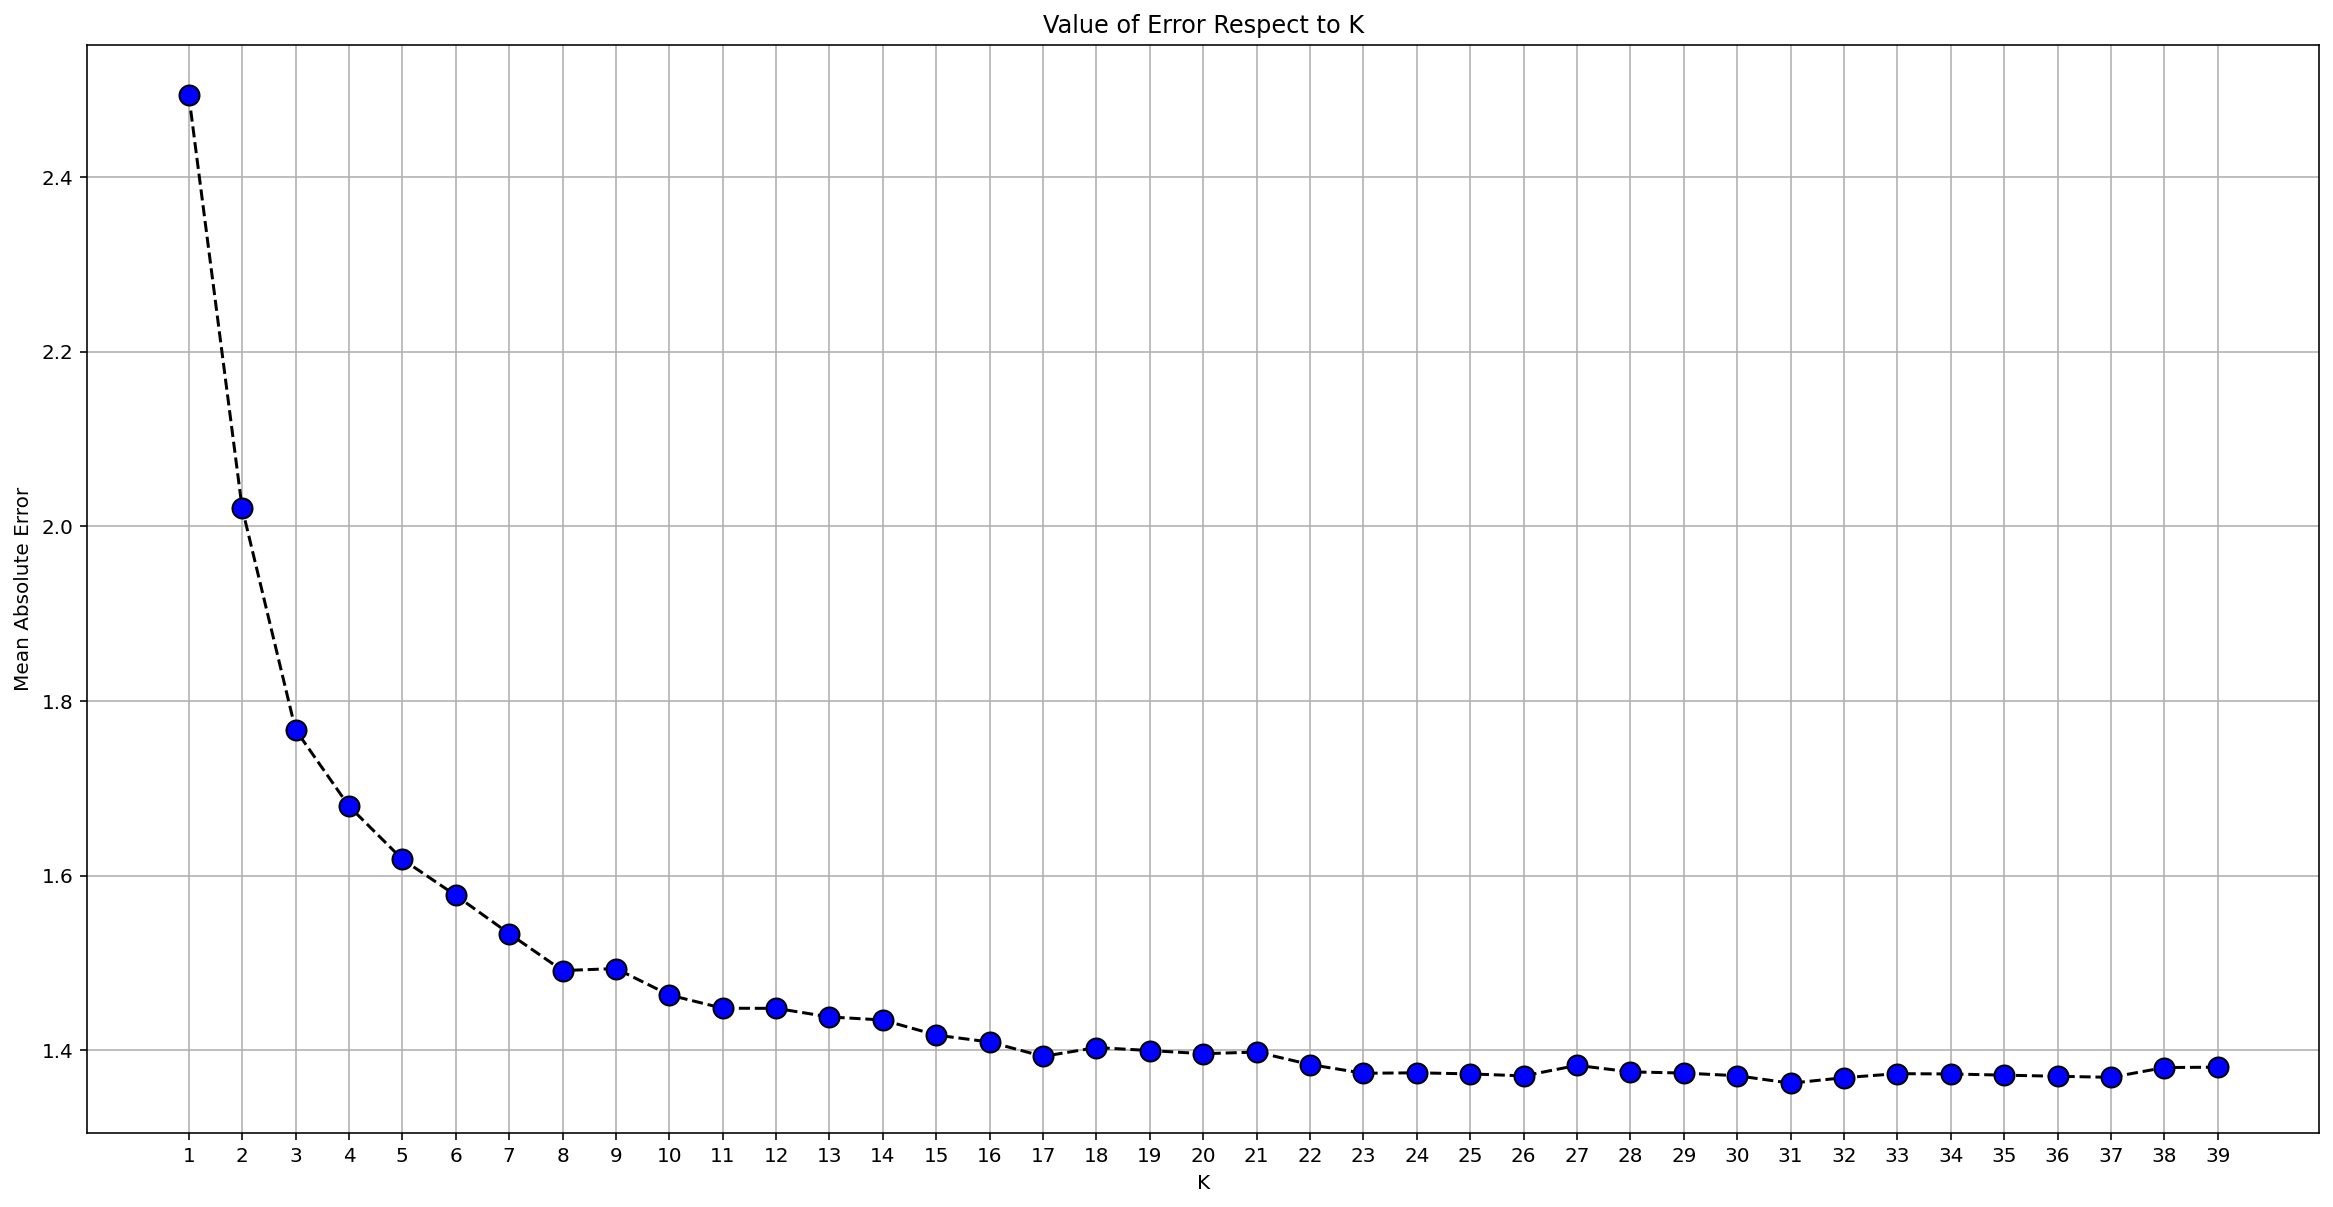

In [ ]:
plt.figure(figsize=(20, 10))  
plt.plot(K_range, error_values, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Value of Error Respect to K')  
plt.xlabel('K')  
plt.ylabel('Mean Absolute Error')
plt.xticks(K_range)
plt.grid()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(31)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                    weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

kmse = mean_squared_error(y_test, y_pred)
kmae = mean_absolute_error(y_test, y_pred)
krmse = np.sqrt(kmse)

print("Mean Absolute Error: {}".format(kmae))
print("Mean Squared Error: {}".format(kmse))
print("Root Mean Squared Error: {}".format(krmse))

Mean Absolute Error: 0.9619699166364626
Mean Squared Error: 1.362251663178571
Root Mean Squared Error: 1.167155372338478


##### Desicion Tree Regression

Desicion Tree Regression Model builds single desicion tree to make prediction on dependent variable, the desicion tree learns from a random sample of the training data. Since this model builds only one tree and this tree uses a random sample from a large data, it's results are more likely to give higher errors on prediction compare to Random Forest.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Results showed that Desicion Tree Regression Model gave higher errors compare to Random Forest Regression Model as predicted.

In [ ]:
y_pred = dt.predict(X_test)

dmse = mean_squared_error(y_test, y_pred)
dmae = mean_absolute_error(y_test, y_pred)
drmse = np.sqrt(dmse)

print("Mean Absolute Error: {}".format(dmae))
print("Mean Squared Error: {}".format(dmse))
print("Root Mean Squared Error: {}".format(drmse))

Mean Absolute Error: 1.2603932584269664
Mean Squared Error: 2.4829494382022474
Root Mean Squared Error: 1.5757377441066287


### Results & Discussion

<font color="blue">
Display and discuss the results of your models. Deploy tables, figures etc. to present your results. Discuss the advantages/disadvantages of models compared to each other.
</font>

#### Accuracy comparison of classification models

We performed comparisons about the classification performances of Random Forest and KNN methods. When the accuracy values of both classifiers were analysed, it can be seen that there is no significant difference between their accuracy values. However, it can be said that, Random Forest Classifier could distinguish the labels slightly more accurate.

<function matplotlib.pyplot.show>

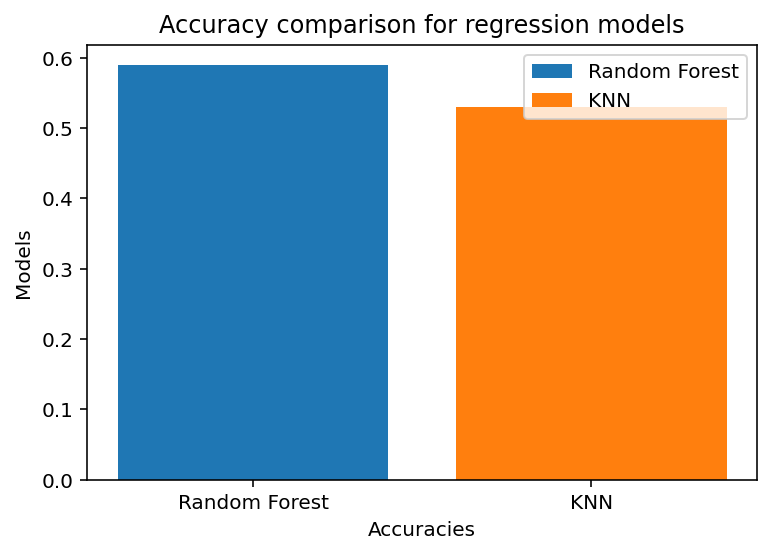

In [ ]:
plt.bar("Random Forest",rf_acc,label="Random Forest")
plt.bar("KNN",0.53 ,label="KNN")
plt.xlabel("Accuracies")
plt.ylabel("Models")
plt.title("Accuracy comparison for regression models")
plt.legend()
plt.show

Hyper parametrically tuned parameters play a significant role in producing high accuracy results when using Random Forest and KNN classifiers. In this part, the classified results under the optimal parameters of each classifier were used to compare the accuracies of classifiers. Using hyperparameters affects the KNN classifiers’ accuracy slightly more than the RF’s. As a result, even if we expected an increase of accuracy for both models, the increase of accuracies are very low when we compared their accuracies with the previous figure. 

<function matplotlib.pyplot.show>

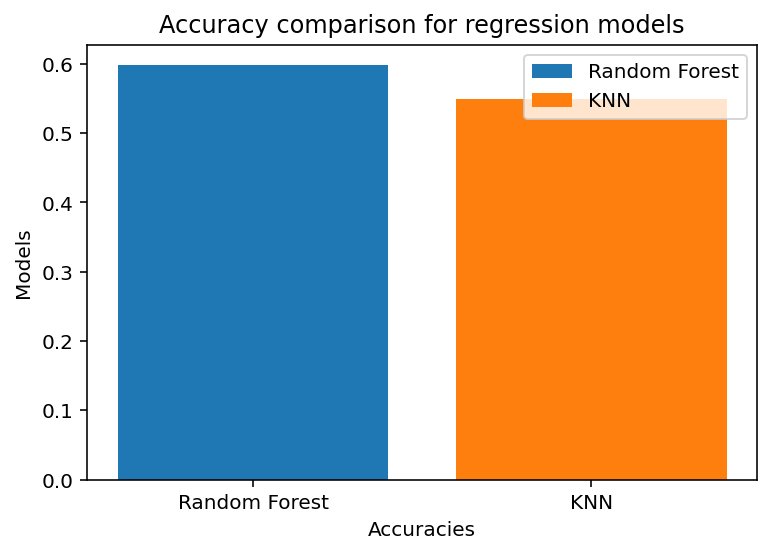

In [ ]:
plt.bar("Random Forest",acc_hyp,label="Random Forest")
plt.bar("KNN",0.55,label="KNN")
plt.xlabel("Accuracies")
plt.ylabel("Models")
plt.title("Accuracy comparison for regression models")
plt.legend()
plt.show

By using counter vectorizer, we taken into account the description and cast columns too. These columns contain some sentences and therefore in order to directly encode them, we used counter vectorizer to use them in our machine learning models. As a results, for both models we saw that, their accuracy values were improved. However, now it can be said that there is a considerable difference between their accuracy values and Random Forest outperforms KNN.

<function matplotlib.pyplot.show>

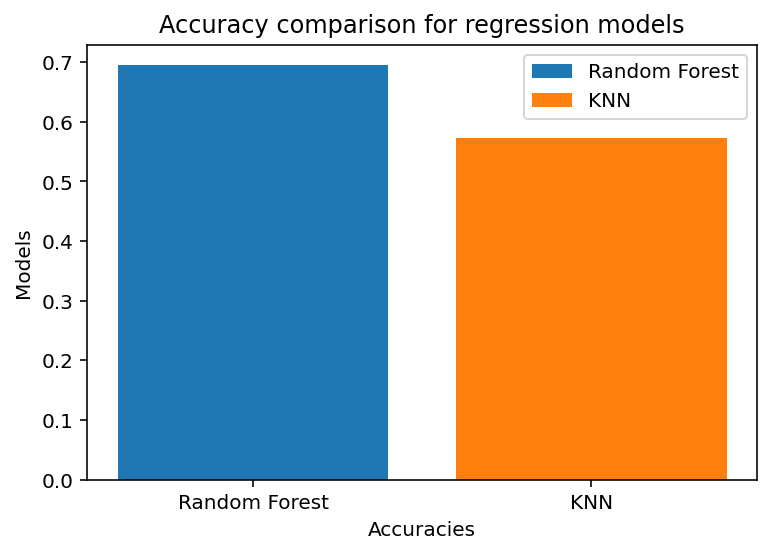

In [ ]:
plt.bar("Random Forest",rf_acc_cv,label="Random Forest")
plt.bar("KNN",knn_best,label="KNN")
plt.xlabel("Accuracies")
plt.ylabel("Models")
plt.title("Accuracy comparison for regression models")
plt.legend()
plt.show

####Error comparison of regression models

In all of our regression models, MSE is higher than MAE but not at significant level, which shows us there is several large errors since MSE is more sensitive to the bigger errors, but they not dominant thru all data points. When we compare the error values, linear regression model gives the best results for all of 3 errors. Therefore, linear relationship is the best way to define the relationship between number of votes, duration, budget and iMDB ratings, however, 
from our training and test sets that we composed with linear regression model , our calculations shows that there is no significant correlation between the vote number and IMDb ratings. As we know our dependent variable , IMDb ratings are not dependant on vote numbers as we predicted.We couldn't obtain a linear line that 
 shows significant correlation.

<function matplotlib.pyplot.show>

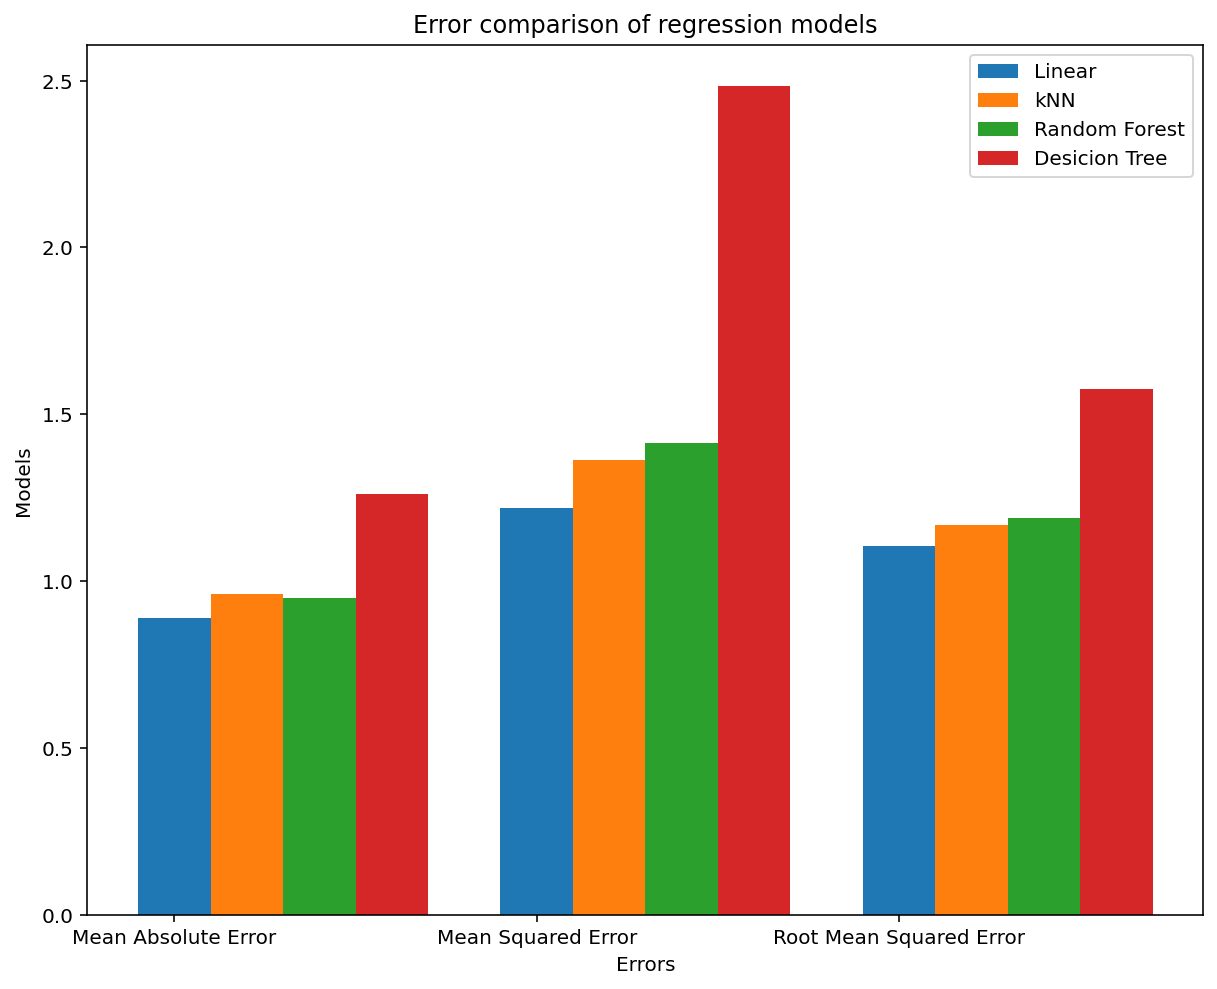

In [ ]:
w=0.2
x=["Mean Absolute Error","Mean Squared Error","Root Mean Squared Error"]

Linear= [MeanAbsoluteError, MeanSquaredError, RootMeanSquaredError]
RandomF= [rfmae, rfmse, rfrmse]
kNN= [kmae, kmse, krmse]
DT= [dmae, dmse, drmse]

bar1= np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3= [i+w for i in bar2]
bar4 = [i+w for i in bar3]

plt.figure(figsize=(10, 8))  

plt.bar(bar1,Linear,0.2,label="Linear")
plt.bar(bar2,kNN,0.2,label="kNN")
plt.bar(bar3,RandomF,0.2,label="Random Forest")
plt.bar(bar4,DT,0.2,label="Desicion Tree")
  

plt.xlabel("Errors")
plt.ylabel("Models")
plt.title("Error comparison of regression models")
plt.xticks(bar1,x)
plt.legend()
plt.show

####Comparison of Recommendation Systems

In order to control the correctness of our recommendation systems that we constructed with k-means and cosine similarity,                  
first we compare k-means and cosine results.                   
Then secondly we verify the results with our experiences.

From the array below, you can see the constructed array from k-means clustering. Every number represents in which cluster is this movie or tv show is in.

In [ ]:
with numpy.printoptions(threshold=numpy.inf):
    print(y_kmeans10)


#print(y_kmeans10[283]) we used this part to find the cluster of a movie or tv show

[2 0 7 4 0 0 4 4 0 7 0 4 0 4 4 4 0 7 0 0 2 3 4 0 2 0 2 1 8 0 2 2 7 0 1 0 5
 7 0 9 1 7 7 1 2 5 8 1 1 7 9 1 9 4 7 9 7 5 7 4 2 1 0 9 4 1 7 4 1 1 7 9 1 5
 1 8 8 1 1 1 2 2 1 1 4 5 0 1 7 8 3 7 0 2 7 5 4 1 9 2 1 8 1 3 9 7 7 1 1 1 1
 1 4 0 4 9 9 0 8 1 4 7 3 2 7 5 7 9 7 0 1 1 7 3 8 7 9 9 3 7 9 3 7 4 8 6 3 4
 9 0 1 7 1 7 6 4 8 5 3 0 4 0 8 0 1 0 9 5 0 1 4 7 2 3 3 7 3 9 1 4 0 8 2 9 2
 7 8 7 2 8 5 9 3 8 4 1 3 0 4 3 5 0 6 2 7 3 0 8 3 8 4 0 3 1 7 1 4 0 4 3 4 1
 2 7 5 0 4 8 2 5 1 5 1 1 1 2 2 3 0 7 9 0 0 7 9 8 6 8 1 2 8 2 7 3 1 4 3 5 5
 0 4 7 7 3 0 4 7 7 9 2 9 1 2 5 4 4 5 8 5 1 2 3 0 4 1 8 3 3 1 5 7 5 1 1 1 7
 1 1 3 4 5 5 3 0 7 5 5 3 1 3 4 9 9 3 5 1 3 7 1 7 0 4 3 4 2 5 7 5 1 9 7 7 1
 1 9 3 3 1 5 0 5 0 3 5 3 1 9 8 7 5 1 4 1 0 0 5 5 8 1 9 4 8 3 5 4 3 5 0 4 5
 0 5 1 5 5 1 9 8 5 3 0 5 3 8 5 3 0 5 4 0 9 3 5 4 5 4 3 5 5 7 4 4 9 2 5 5 3
 7 5 3 7 4 3 2 3 5 3 1 7 0 7 3 8 8 3 1 5 3 5 5 8 3 7 3 7 4 5 5 3 3 4 4 2 5
 0 3 8 5 5 3 8 3 0 8 9 5 4 0 5 5 5 9 0 0 5 4 2 1 0 5 1 0 7 5 3 4 7 1 4 3 3
 7 3 8 1 9 3 5 1 4 1 3 4 

To verify the results, we select the movies or tv shows that we already watched before. Therefore we first look at the Lucifer tv show.
For the Lucifer tv show, in the cosine recommendation system we saw that Lucifer, Baby and The Calling are similar to each other. Also when we look at the array that constructed from the k-means clustering, we saw that these 3 films have same indexes in that array and that means these 3 films are placed in the same cluster by the k-means algorithm. As a result, it can be said that there is a match between the results of both recommendation systems.                      
Also, from our experiences, we also agree that these films are similar, for example in these 3 films, the relationship between the characters kind a similar. They have both drama and deep emotional scenes.  

In [ ]:
recommend('Lucifer').head()

,Title,Score
0,Baby,0.426401
1,Ocean's Twelve,0.395087
2,The Calling,0.395006
3,Love for Sale,0.371825
4,The Black Room,0.368376


Then we select another film that we watched. For this reason, we then look at the Kaçak tv show. For the Kaçak tv show, in the cosine recommendation system we saw that Kaçak, Stereo are similar to each other. Also when we look at the array that constructed from the k-means clustering, we saw that these 2 films have same indexes in that array and that means these 2 films are placed in the same cluster by the k-means algorithm. As a result, it can be said that there is a match between the results of both recommendation systems.   

Additionally, when we compare Stereo and Kaçak's similarities according to our experiences, we notice that, they have both action and crime scenes. In both of them, the events are developing fastly.          

In [ ]:
recommend('Kaçak').head()

,Title,Score
0,Stereo,0.412813
1,Ip Man 2,0.397562
2,Ocean's Twelve,0.395612
3,Son of a Gun,0.364646
4,The Trap,0.361211




However, there are some films and tv shows that are not matching in our recommendation systems. We thought that, one of the main reason for this mismatch might be the differences between the how algorithms work. For example, k-means is using eucledian distance and cosine similarity is using the dot product's cosine value to identify the similarities. Therefore the difference might be also because of the distance parameters of the algorithms.                                            
Also, k-means based on the minimizing the intra-cluster difference and keeping the clusters as far as possible and tries to separate the clusters spherically. On the other hand, cosine is based on the taking the string values as words and looks at its similarities. That might be another reason why we couldn't see hundred percent match between cosine similarity and k-means.



## Conclusion
According to the results of the implemented algorithms that mentioned above, both the film recommendation and IMDb prediction systems are working in a some extent. We compared their performances with each other to understand which algorithms are performing better in our Netflix-IMDb dataset.                    
First we compared the accuracy values of classification model that we used in this project which are KNN and Random Forest. They do not have a significant difference between their accuracy values. However, after using the cast, description and genre features by implementing counter vectorizer, for both RF and KNN, we saw that the difference between their accuracy values was considerably increased and it can be said that Random Forest outperforms the KNN while also using these 3 features.                                           




According to the interpreted results of regression models, we couldn't obtain strong correlation between number of votes, duration, budget and iMDB ratings when we take iMDB ratings as dependent variable. In general, models such as Random Forest gives more accurate results in large datasets, however, Linear Regression Model gave lowest error values for our case, even so, we couldn't obtain high coefficient values for Linear Regression Model. Therefore, we can say that the relationship between number of votes, duration, budget and iMDB ratings has a linear structure but that relationship is not strong.

      
For our recommendation systems, as can be seen in the results above, they generally recommend the movies and tv shows similarly in their results. Even if they have some similar results, they also have some different results that are not match with each other. When we examine the both algorithm's results, we compare them with our experiences and we decided that cosine similarity's results are more consistent with our experiences. The reason of this difference might be about algorithm's performances. Because  k-means based on the minimizing the intra-cluster difference and keeping the clusters as far as possible and tries to separate the clusters spherically. That may results in mistakes in separation of clusters when we think about their content. Cosine similarity achieves a better job  when we compare its results with our experiences and that might be because of the fact that it is based on using the string values and therefore maybe because of this reason, it analyzes the similarities better.                                                  

Taking everything into consideration, we conclude that, For IMDb prediction algorithms, in clasification part, at first both KNN and RF have close accuracies but after implementing the conter vectorizer, we saw that RF gives a higher accuracy value. For the regression, we concluded that linear regression was performed better when we compare it with KNN, RF and Decision Tree regressions. Also, for our recommendation systems cosine similarity performed better than k-means.



## Future Work


By using a more recent and comprehensive dataset might give better results and we can make our interpretations more correctly. Also other supervised and unsupervised machine learning models can be implemented to determine the best algorithms by using more number of models.




## Work Division


**Ece Kurnaz**     
Data Cleaning        
Encoding      
Linear Regression                               
Results                       
Conclusion

**Pelin Yüksel**      
Introduction                          
K-means Clustering     
Random Forest Classification  
Results                       
Conclusion

**Beril Yanıkömeroğlu**  
Data Preprocessing  
Data Exploration    
Cosine Similarity     
Pearson Correlation  
Results                       
Conclusion

**Erdem Baha Arslan**        
Introduction      
K Nearest Neighbor (KNN)  
Results                       
Conclusion

**Mustafa Çağdaş Çapuk**     
Spearman Correlation      
Data Exploration      
Results                       
Conclusion     